In [553]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [554]:
def allbut(*names):
    names = set(names)
    return [item for item in levels if item not in names]

In [555]:
color = [(127,201,127),(190,174,212),(253,192,134),(56,108,176),(180,17,110)]
for i, rgb in enumerate(color):
    r, g, b = rgb
    color[i] = r/255.0, g/255.0, b/255.0
plt.rcParams['axes.axisbelow'] = True
line_styles = ['solid', 'dotted', 'dashed', 'dashdot']
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [556]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/PrideRectangle_BR_eps_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/RainbowStaircase_eps_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/SlavicGrandmaTextil_eps_main_experiments.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

Unnamed: 0           bricks_layout  ball_start_x  timestamps_to_win  \
0               0  PrideRectangle_BR_5_35            -2               1000   
1               1  PrideRectangle_BR_5_35            -1               1000   
2               2  PrideRectangle_BR_5_35             0               1000   
3               3  PrideRectangle_BR_5_35             1               1000   
4               4  PrideRectangle_BR_5_35             2               1000   
...           ...                     ...           ...                ...   
29995        1995  SlavicGrandmaTextil_18            -2                134   
29996        1996  SlavicGrandmaTextil_18            -1                 87   
29997        1997  SlavicGrandmaTextil_18             0                 85   
29998        1998  SlavicGrandmaTextil_18             1                154   
29999        1999  SlavicGrandmaTextil_18             2                119   

       gamma  start_epsilon   epsilon  max_episode_num  current_episode_num  \
0       0.98           0.03  0.029926            40000                  100   
1       0.98           0.03  0.029926            40000                  100   
2       0.98           0.03  0.029926            40000                  100   
3       0.98           0.03  0.029926            40000                  100   
4       0.98           0.03  0.029926            40000                  100   
...      ...            ...       ...              ...                  ...   
29995   0.98           0.03  0.011037            40000                40000   
29996   0.98           0.03  0.011037            40000                40000   
29997   0.98           0.03  0.011037            40000                40000   
29998   0.98           0.03  0.011037            40000                40000   
29999   0.98           0.03  0.011037            40000                40000   

      reward_system  policy_found_in_s  brick_length  run  
0            normal                  0            35    2  
1            normal                  0            35    2  
2            normal                  0            35    2  
3            normal                  0            35    2  
4            normal                  0            35    2  
...             ...                ...           ...  ...  
29995        normal                  0            18    2  
29996        normal                  0            18    2  
29997        normal                  0            18    2  
29998        normal                  0            18    2  
29999        normal                  0            18    2  

[150000 rows x 13 columns]

# EPSILON EXPERIMENTS

## OVER EPISODES

In [557]:
grouped_df = combined_df.groupby(['current_episode_num','start_epsilon','bricks_layout'])['timestamps_to_win'].mean().reset_index()
grouped_df

current_episode_num  start_epsilon           bricks_layout  \
0                     100           0.01   PrideRectangle_BR_1_7   
1                     100           0.01  PrideRectangle_BR_3_21   
2                     100           0.01  PrideRectangle_BR_5_35   
3                     100           0.01     RainbowStaircase_16   
4                     100           0.01  SlavicGrandmaTextil_18   
...                   ...            ...                     ...   
9995                40000           0.30   PrideRectangle_BR_1_7   
9996                40000           0.30  PrideRectangle_BR_3_21   
9997                40000           0.30  PrideRectangle_BR_5_35   
9998                40000           0.30     RainbowStaircase_16   
9999                40000           0.30  SlavicGrandmaTextil_18   

      timestamps_to_win  
0            828.533333  
1           1000.000000  
2           1000.000000  
3           1000.000000  
4            561.133333  
...                 ...  
9995         220.666667  
9996         760.000000  
9997         794.266667  
9998         414.066667  
9999         114.666667  

[10000 rows x 4 columns]

/tmp/ipykernel_68943/4194934010.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = combined_df.groupby(['start_epsilon', 'current_episode_num']).mean().reset_index()
/tmp/ipykernel_68943/4194934010.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


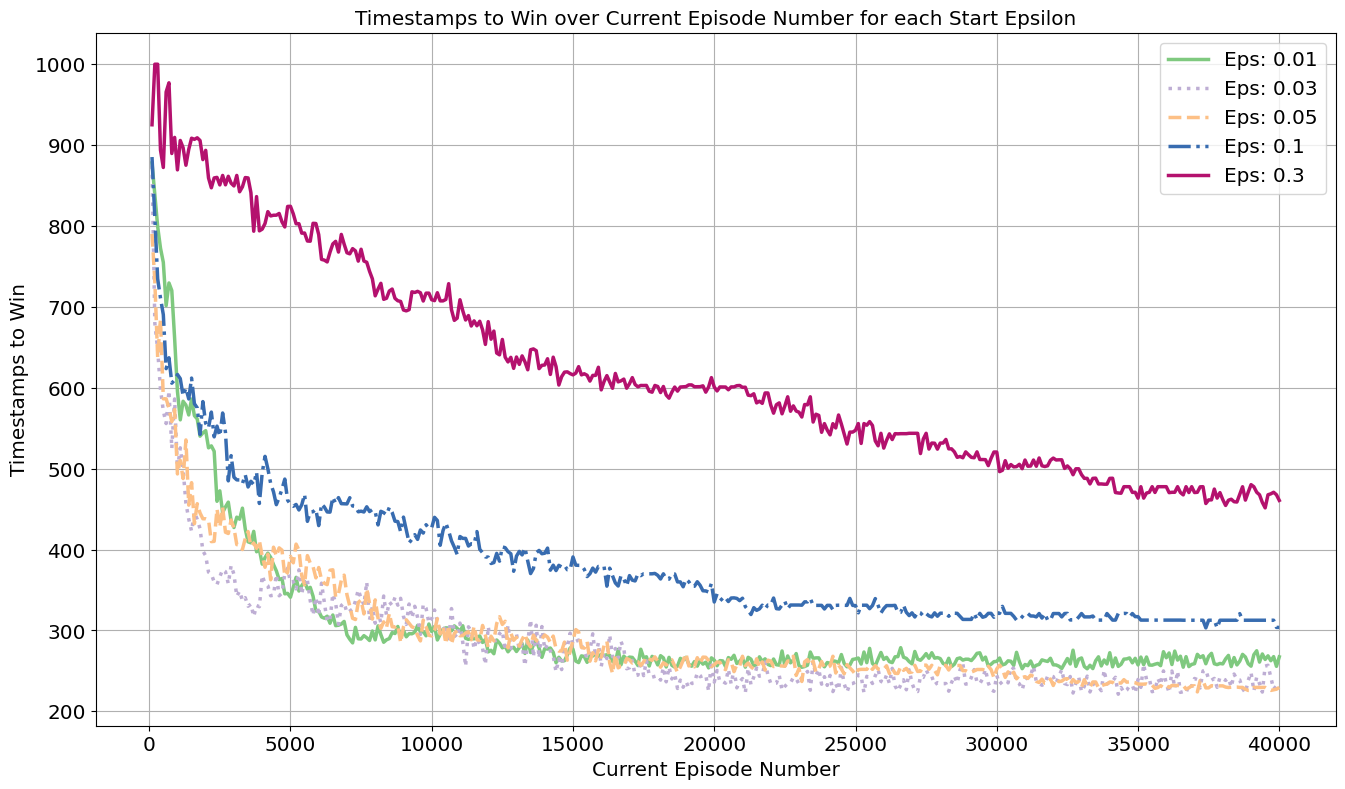

/tmp/ipykernel_68943/4194934010.py:21: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


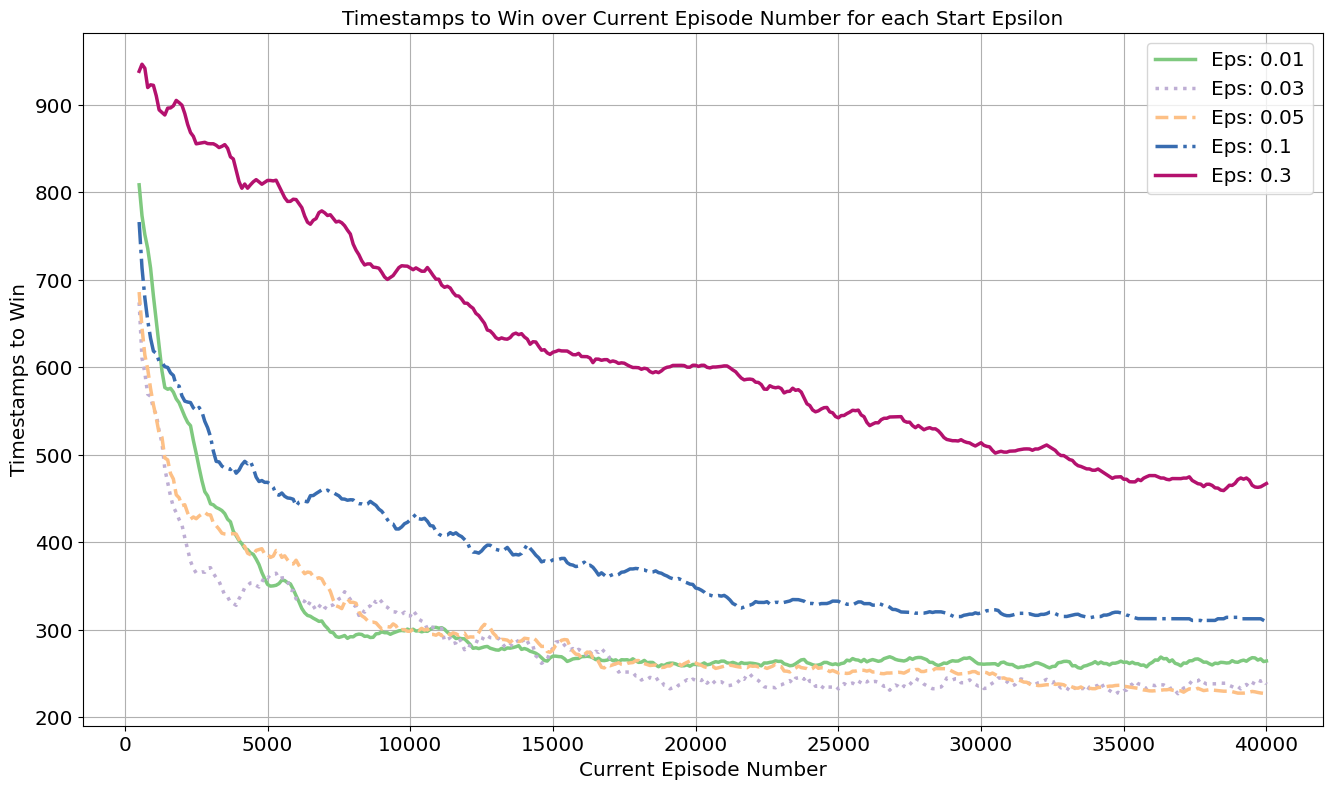

In [558]:
grouped_data = combined_df.groupby(['start_epsilon', 'current_episode_num']).mean().reset_index()
grouped_data = grouped_data.groupby(['start_epsilon'])

for i, (epsilon, group) in enumerate(grouped_data):
    smoothed_data = group['timestamps_to_win'].rolling(window=1).mean()
    plt.plot(
        group['current_episode_num'], 
        smoothed_data, 
        label=f'Eps: {epsilon}', 
        color=color[i % len(color)], 
        linewidth=2.5, 
        linestyle=line_styles[i % len(line_styles)])

plt.xlabel('Current Episode Number')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win over Current Episode Number for each Start Epsilon')
plt.grid(True)
plt.legend()
plt.show()

for i, (epsilon, group) in enumerate(grouped_data):
    smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
    plt.plot(
        group['current_episode_num'], 
        smoothed_data, 
        label=f'Eps: {epsilon}', 
        color=color[i % len(color)], 
        linewidth=2.5, 
        linestyle=line_styles[i % len(line_styles)])

plt.xlabel('Current Episode Number')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win over Current Episode Number for each Start Epsilon')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_68943/2551727066.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


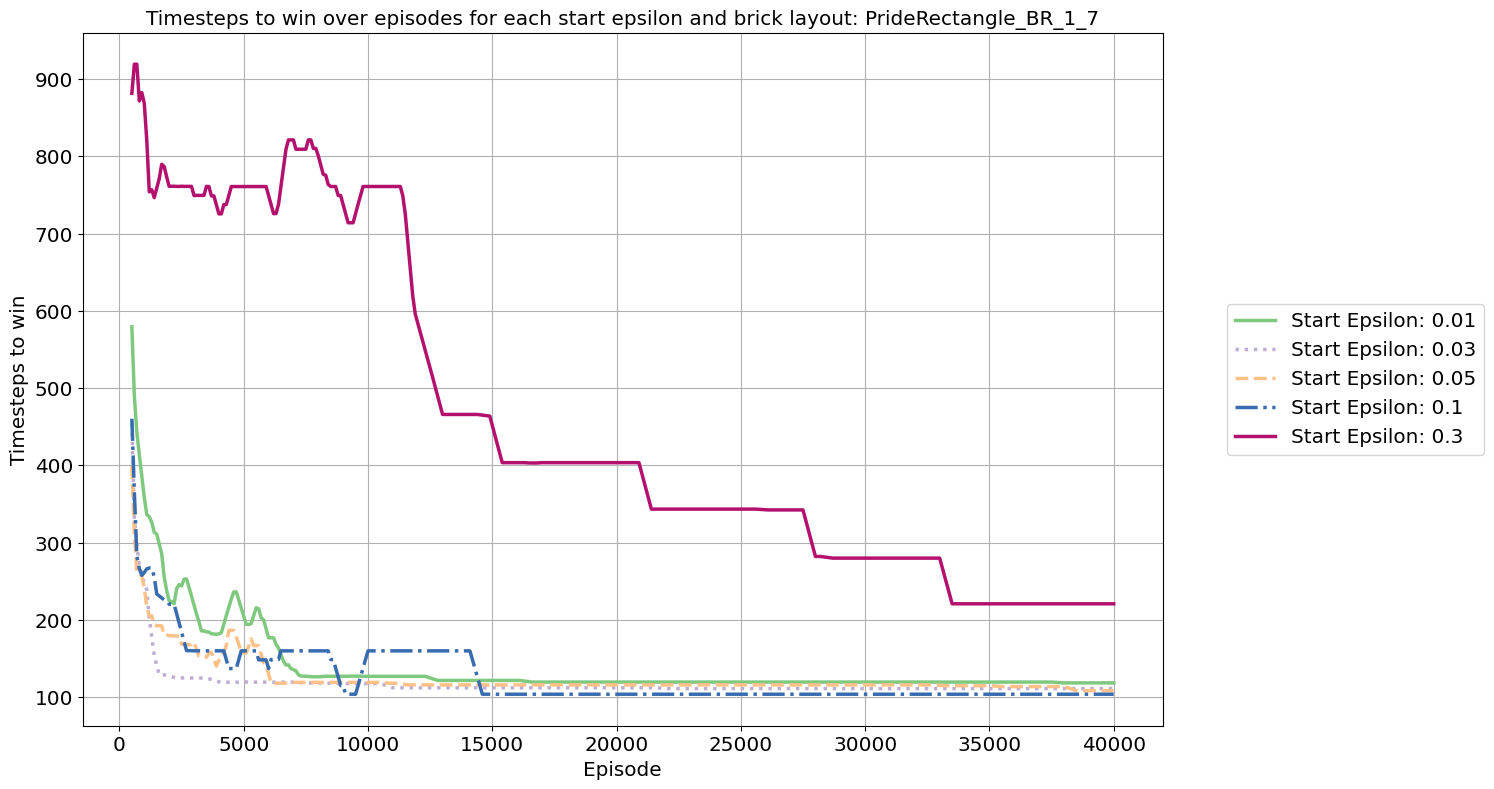

/tmp/ipykernel_68943/2551727066.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


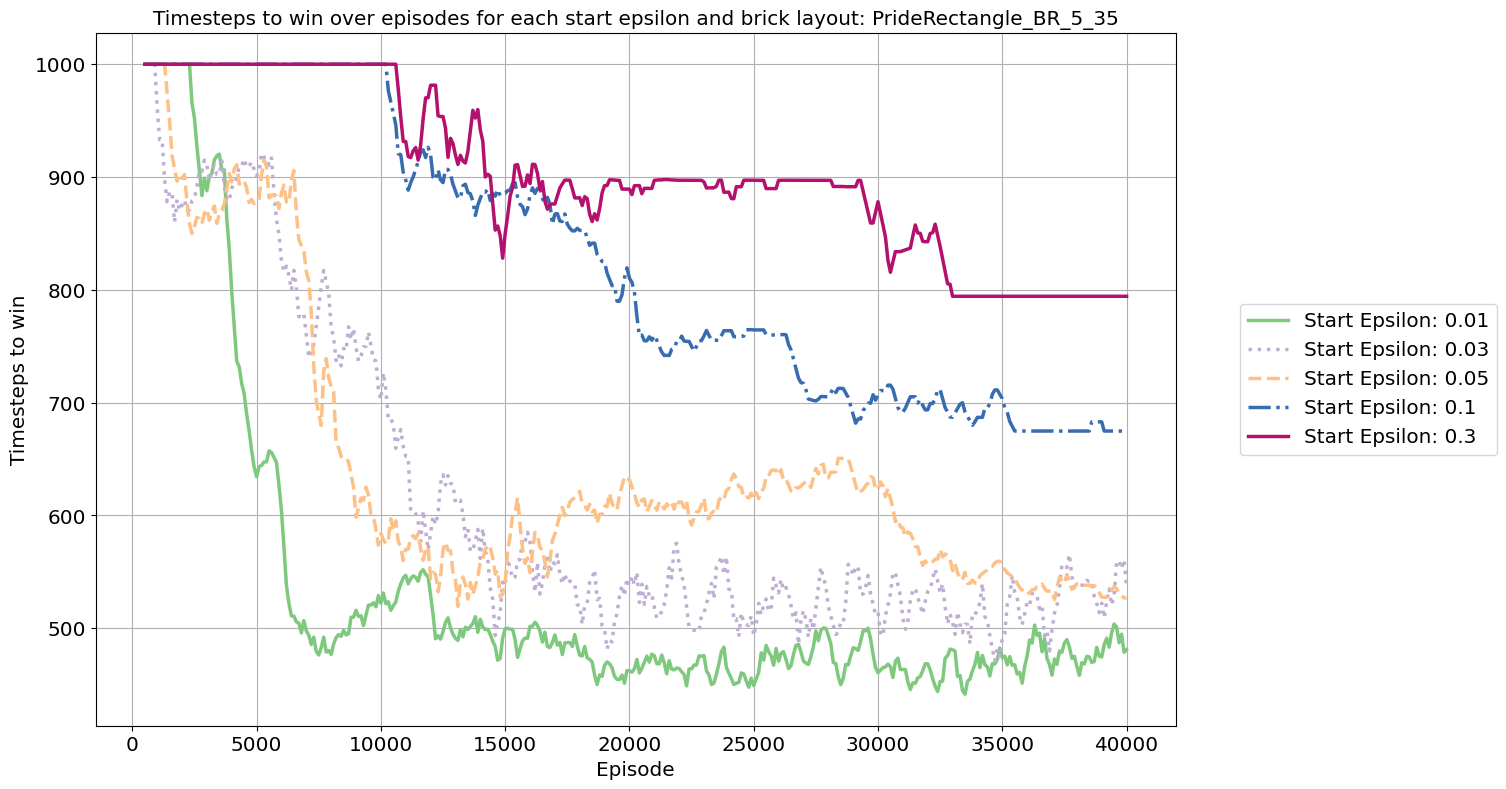

/tmp/ipykernel_68943/2551727066.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


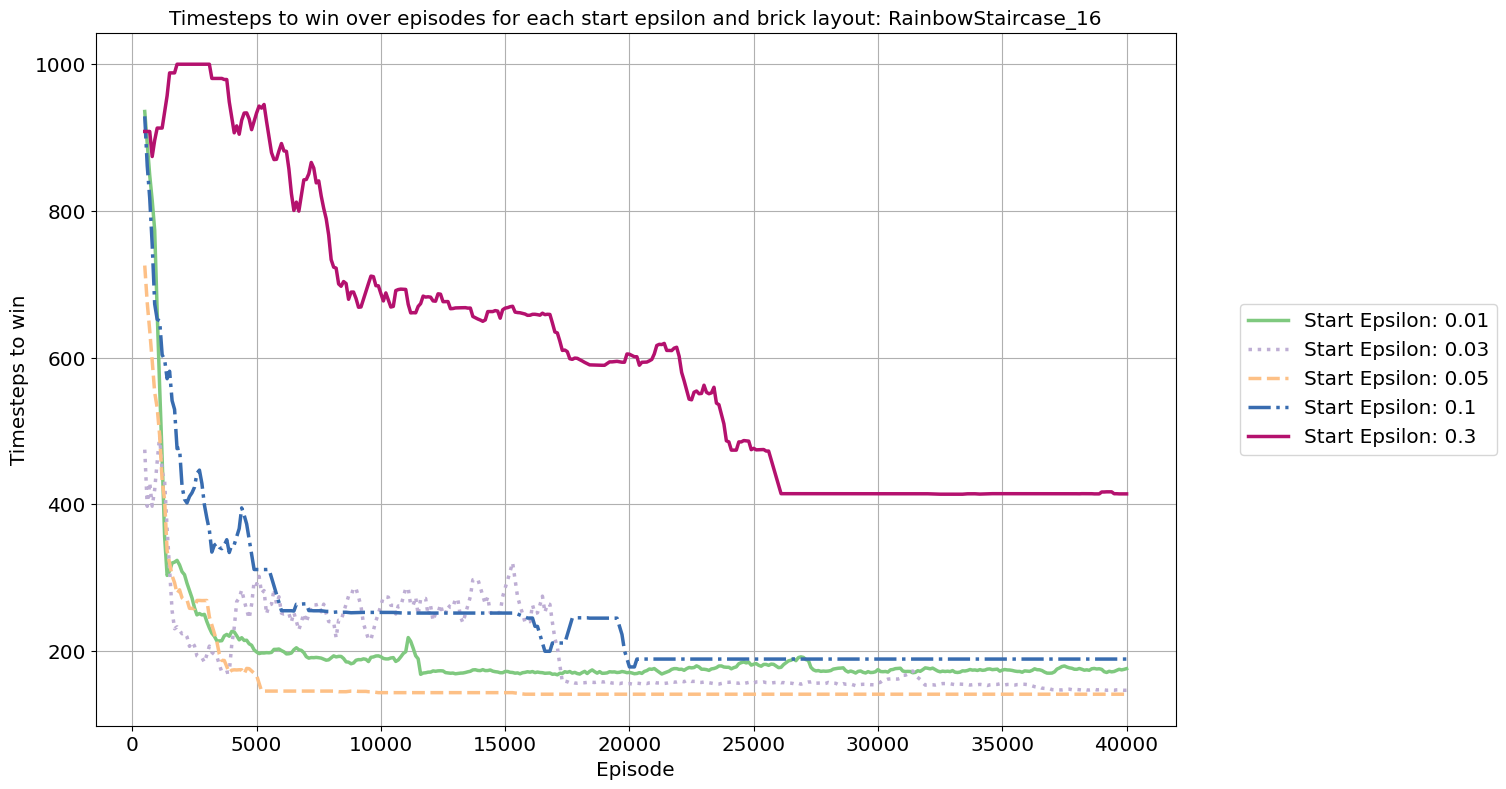

/tmp/ipykernel_68943/2551727066.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):


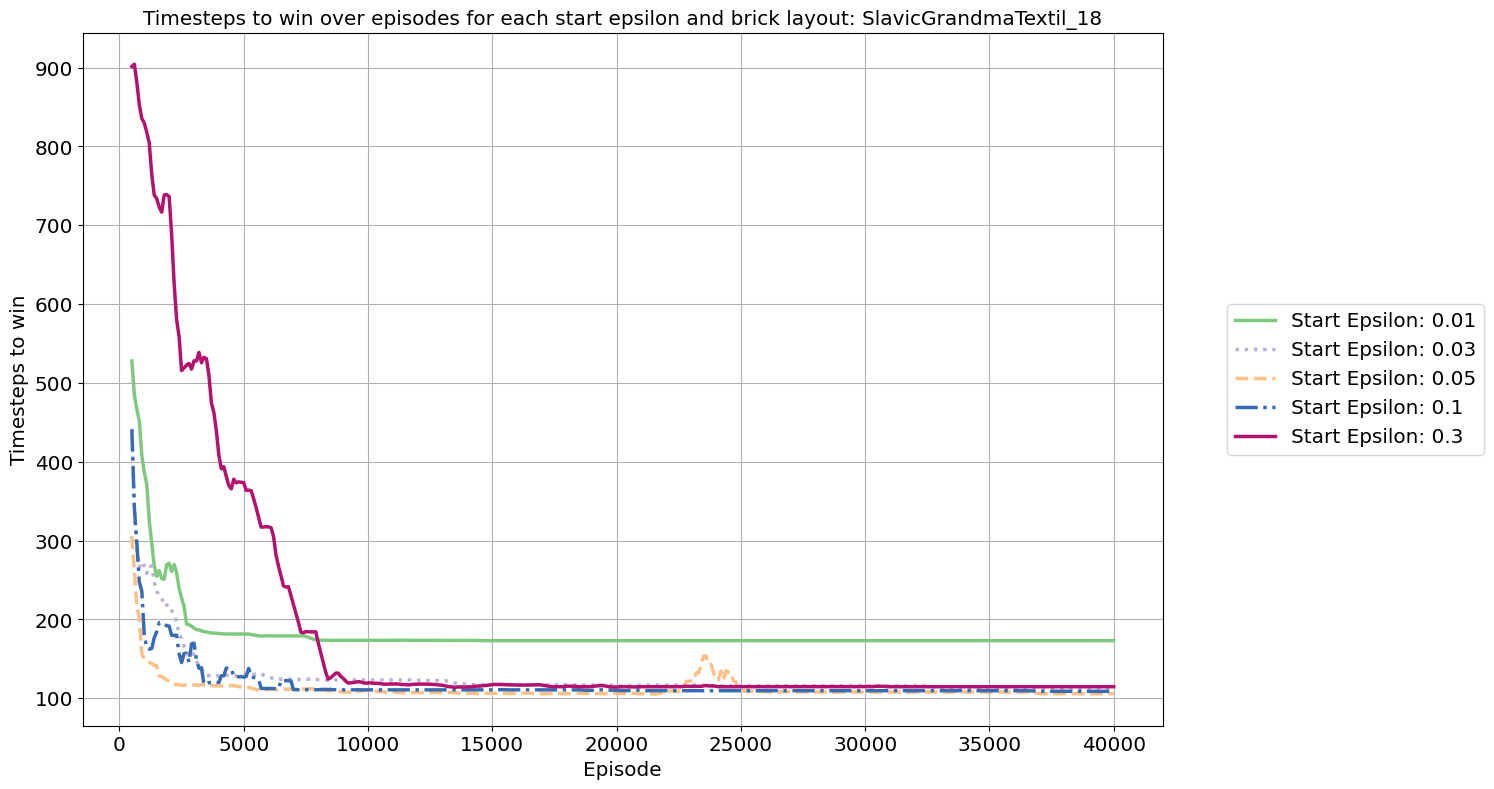

In [559]:
# df = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/PrideRectangle_BR_eps_main_experiments.csv')
grouped_df = combined_df.groupby(['current_episode_num','start_epsilon','bricks_layout'])['timestamps_to_win'].mean().reset_index()

for bricks in grouped_df['bricks_layout'].unique():
    if bricks == 'PrideRectangle_BR_3_21':
        continue
    filtered_df = grouped_df[grouped_df['bricks_layout'] == bricks]
    grouped_data = filtered_df.groupby(['start_epsilon'])

    for i, (epsilon, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Start Epsilon: {epsilon}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    plt.xlabel('Episode')
    plt.ylabel('Timesteps to win')
    plt.title(f'Timesteps to win over episodes for each start epsilon and brick layout: {bricks}')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')    
    plt.subplots_adjust(right=0.8)  
    plt.show()
# PLOT 4 plots

/tmp/ipykernel_68943/2213000161.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/2213000161.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/2213000161.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (epsilon, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/2213000161.py:20: FutureWarning: In a futur

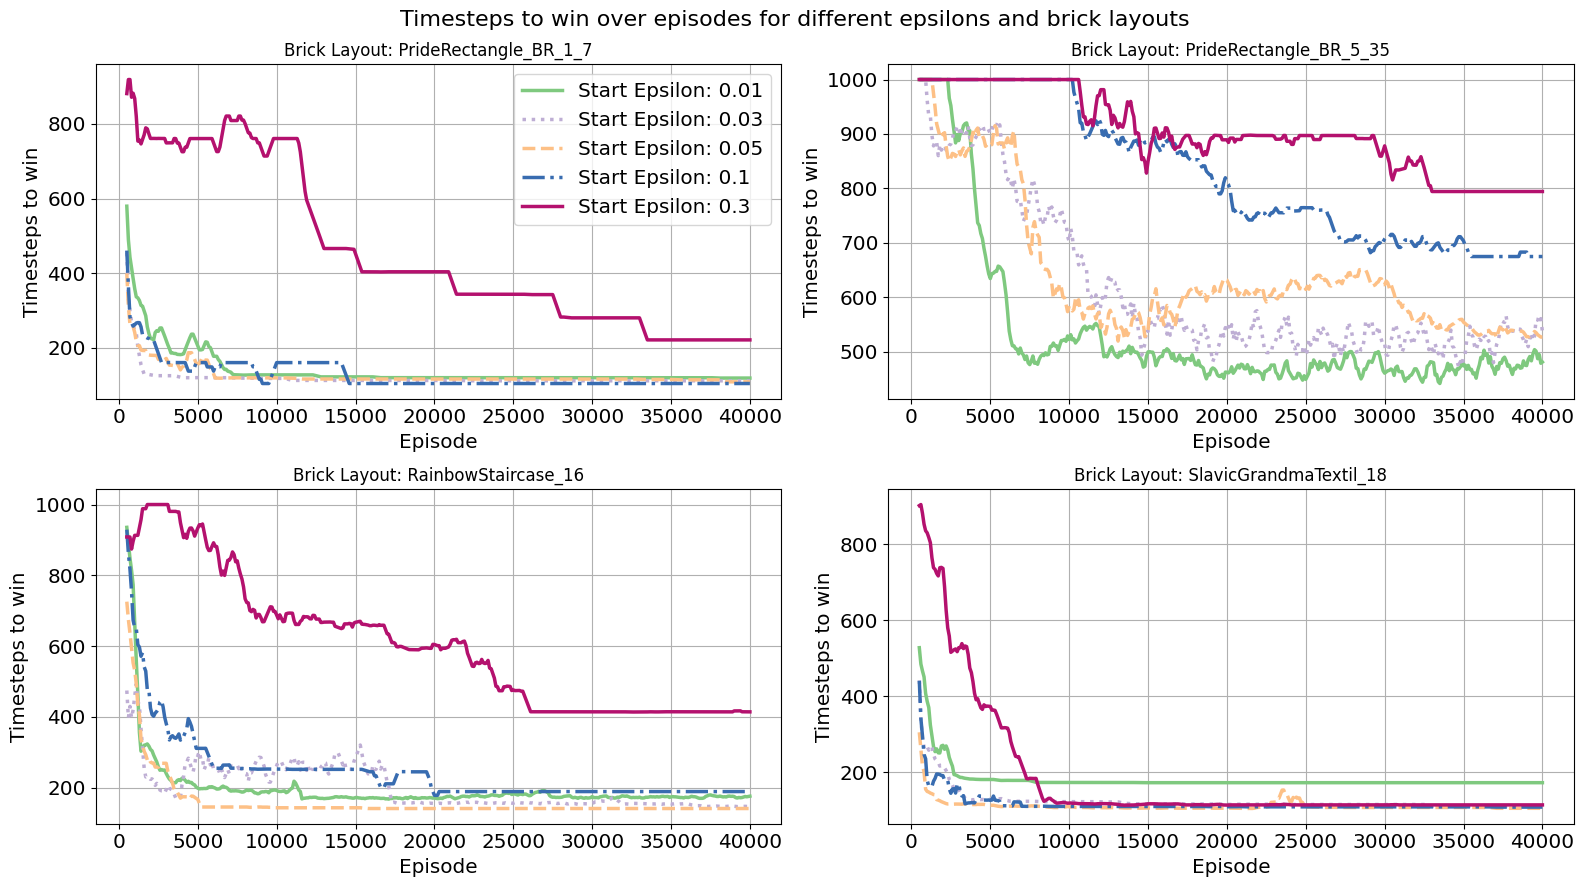

In [560]:
import matplotlib.pyplot as plt

grouped_df = combined_df.groupby(['current_episode_num', 'start_epsilon', 'bricks_layout'])['timestamps_to_win'].mean().reset_index()

# Get unique bricks_layout except 'PrideRectangle_BR_3_21'
brick_layouts = [bricks for bricks in grouped_df['bricks_layout'].unique() if bricks != 'PrideRectangle_BR_3_21']

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

# Define colors and line styles (modify as needed)

fig.suptitle('Timesteps to win over episodes for different epsilons and brick layouts', fontsize=16)

for idx, bricks in enumerate(brick_layouts):
    ax = axs[idx // 2, idx % 2]  # Get the correct subplot
    filtered_df = grouped_df[grouped_df['bricks_layout'] == bricks]
    grouped_data = filtered_df.groupby(['start_epsilon'])

    for i, (epsilon, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        ax.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Start Epsilon: {epsilon}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    ax.set_xlabel('Episode')
    ax.set_ylabel('Timesteps to win')
    ax.set_title(f'Brick Layout: {bricks}', fontsize=12)  # Add the brick layout as a subtitle
    ax.grid(True)
    
    if idx == 0:  # Add legend only to the first subplot
        ax.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()
# plt.savefig("/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/plots/epsilon_layout_comparison2.png", bbox_inches='tight')

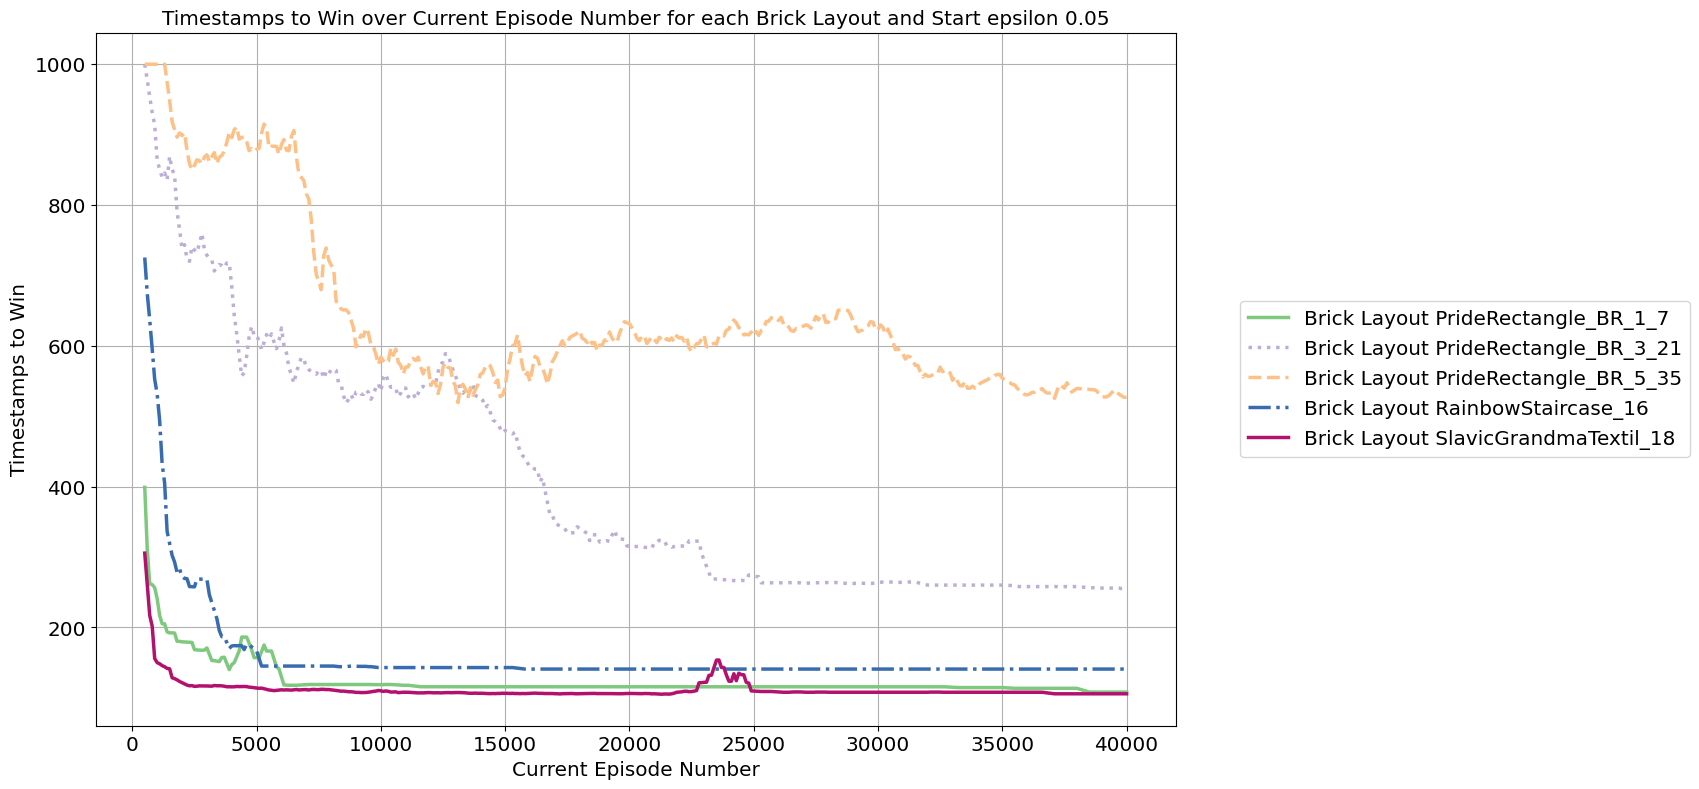

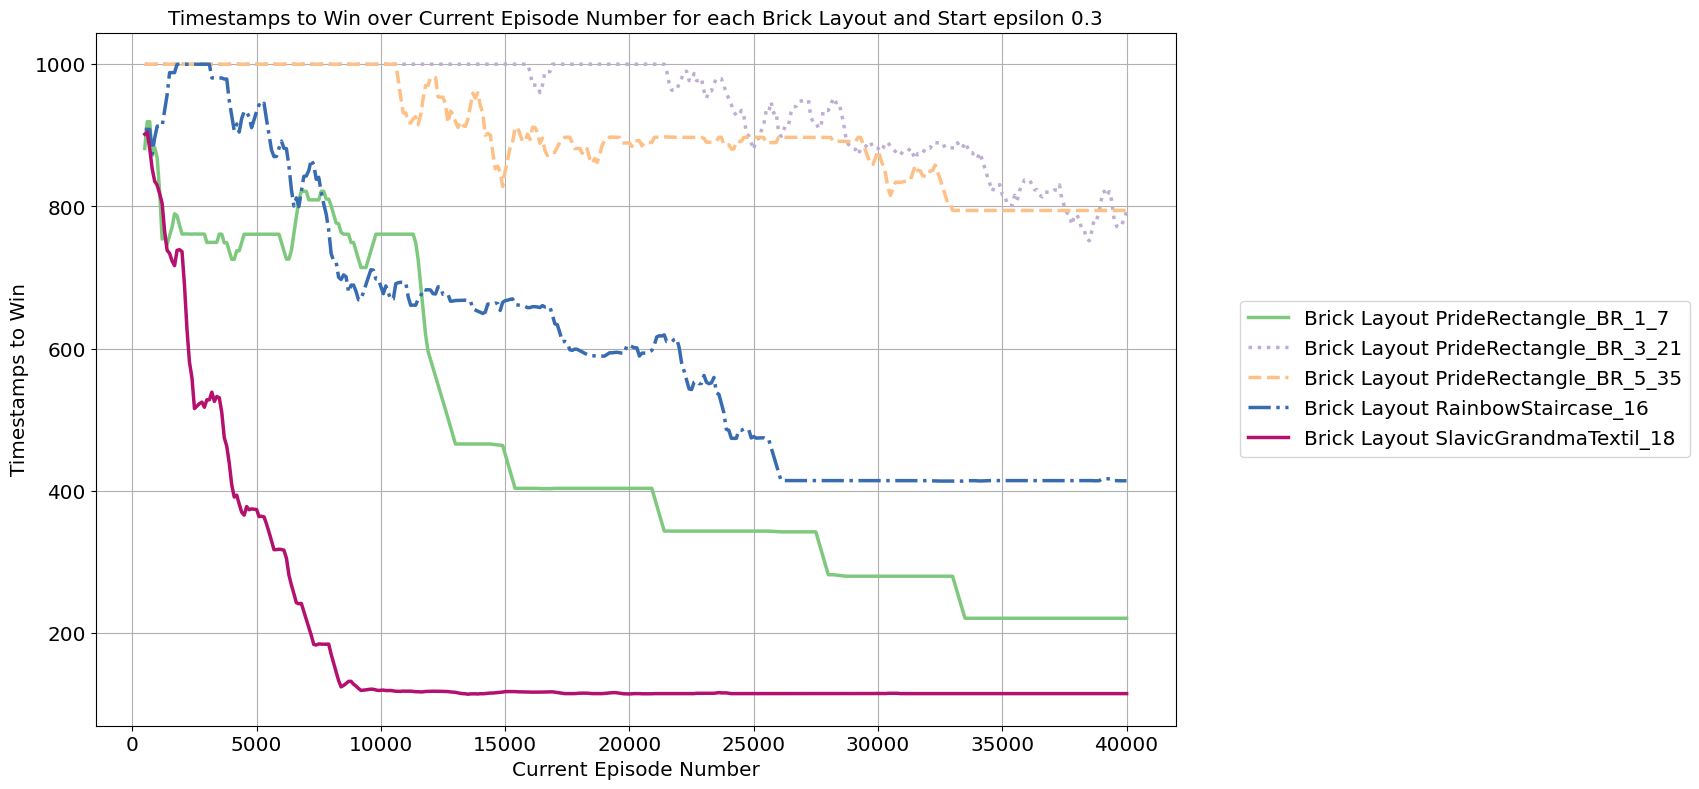

In [561]:
# for eps in [0.01, 0.03, 0.05, 0.1, 0.3]:
for eps in [0.05, 0.3]:
    filtered_df = grouped_df[grouped_df['start_epsilon'] == eps]

    grouped_data = filtered_df.groupby(['start_epsilon','bricks_layout'])
    grouped_data 

    for i, (epsilon, group) in enumerate(grouped_data):

        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Brick Layout {epsilon[1]}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    plt.xlabel('Current Episode Number')
    plt.ylabel('Timestamps to Win')
    plt.title(f'Timestamps to Win over Current Episode Number for each Brick Layout and Start epsilon {eps}')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')    
    plt.subplots_adjust(right=0.8)  
    plt.show()
#TODO save 2 plots 0.3 and 0.05

In [562]:
grouped_df = combined_df.groupby(['current_episode_num', 'start_epsilon', 'bricks_layout'])['timestamps_to_win'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Set main title for the entire figure
fig.suptitle('Timesteps to win over episodes for different epsilons and brick layouts', fontsize=16)

# for eps in [0.01, 0.03, 0.05, 0.1, 0.3]:
for idx, eps in enumerate([0.05, 0.3]):
    ax = axs[idx]  # Get the correct subplot
    filtered_df = grouped_df[grouped_df['start_epsilon'] == eps]

    grouped_data = filtered_df.groupby(['start_epsilon', 'bricks_layout'])
    grouped_data 

    for i, (epsilon, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        ax.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'{epsilon[1]}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    ax.set_xlabel('Episode')
    ax.set_ylabel('Timesteps to win')
    ax.set_title(f'Epsilon: {eps}', fontsize=12)  # Add epsilon value as a subtitle
    ax.grid(True)
    
    if idx == 0:  # Add legend only to the first subplot
        ax.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()

## ENDSTATES

In [563]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/PrideRectangle_BR_eps_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/RainbowStaircase_eps_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/SlavicGrandmaTextil_eps_main_experiments.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length', 'current_episode_num'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df = grouped_df[grouped_df['current_episode_num'] == 40000]
grouped_df = grouped_df.sort_values(['start_epsilon', 'bricks_layout'])
grouped_df_timestep = grouped_df
grouped_df_timestep

/tmp/ipykernel_68943/1163876852.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length', 'current_episode_num'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


start_epsilon           bricks_layout  brick_length  \
399            0.01   PrideRectangle_BR_1_7             7   
799            0.01  PrideRectangle_BR_3_21            21   
1199           0.01  PrideRectangle_BR_5_35            35   
1599           0.01     RainbowStaircase_16            16   
1999           0.01  SlavicGrandmaTextil_18            18   
2399           0.03   PrideRectangle_BR_1_7             7   
2799           0.03  PrideRectangle_BR_3_21            21   
3199           0.03  PrideRectangle_BR_5_35            35   
3599           0.03     RainbowStaircase_16            16   
3999           0.03  SlavicGrandmaTextil_18            18   
4399           0.05   PrideRectangle_BR_1_7             7   
4799           0.05  PrideRectangle_BR_3_21            21   
5199           0.05  PrideRectangle_BR_5_35            35   
5599           0.05     RainbowStaircase_16            16   
5999           0.05  SlavicGrandmaTextil_18            18   
6399           0.10   PrideRectangle_BR_1_7             7   
6799           0.10  PrideRectangle_BR_3_21            21   
7199           0.10  PrideRectangle_BR_5_35            35   
7599           0.10     RainbowStaircase_16            16   
7999           0.10  SlavicGrandmaTextil_18            18   
8399           0.30   PrideRectangle_BR_1_7             7   
8799           0.30  PrideRectangle_BR_3_21            21   
9199           0.30  PrideRectangle_BR_5_35            35   
9599           0.30     RainbowStaircase_16            16   
9999           0.30  SlavicGrandmaTextil_18            18   

      current_episode_num  timestamps_to_win  policy_found_in_s  
399                 40000         118.266667                0.0  
799                 40000         373.733333                0.0  
1199                40000         494.866667                0.0  
1599                40000         176.866667                0.0  
1999                40000         173.066667                0.0  
2399                40000         110.866667                0.0  
2799                40000         284.400000                0.0  
3199                40000         507.866667                0.0  
3599                40000         145.533333                0.0  
3999                40000         111.333333                0.0  
4399                40000         108.200000                0.0  
4799                40000         255.866667                0.0  
5199                40000         537.066667                0.0  
5599                40000         140.866667                0.0  
5999                40000         105.733333                0.0  
6399                40000         103.600000                0.0  
6799                40000         442.533333                0.0  
7199                40000         674.800000                0.0  
7599                40000         188.800000                0.0  
7999                40000         108.866667                0.0  
8399                40000         220.666667                0.0  
8799                40000         760.000000                0.0  
9199                40000         794.266667                0.0  
9599                40000         414.066667                0.0  
9999                40000         114.666667                0.0

In [564]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/PrideRectangle_BR_eps_policy_times.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/RainbowStaircase_eps_policy_times.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/SlavicGrandmaTextil_eps_policy_times.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df = combined_df.sort_values(['brick_length'])
combined_df

Unnamed: 0           bricks_layout  ball_start_x  timestamps_to_win  \
9            0   PrideRectangle_BR_1_7             2                172   
27           3   PrideRectangle_BR_1_7             2                 97   
26           2   PrideRectangle_BR_1_7             2                 98   
25           1   PrideRectangle_BR_1_7             2                 98   
24           0   PrideRectangle_BR_1_7             2                110   
..         ...                     ...           ...                ...   
20           1  PrideRectangle_BR_5_35             2                256   
21           2  PrideRectangle_BR_5_35             2                252   
23           4  PrideRectangle_BR_5_35             2               1000   
16           2  PrideRectangle_BR_5_35             2                170   
0            0  PrideRectangle_BR_5_35             2                557   

    gamma  start_epsilon   epsilon  max_episode_num  current_episode_num  \
9    0.98           0.01  0.003679            40000                40000   
27   0.98           0.10  0.036789            40000                40000   
26   0.98           0.05  0.018394            40000                40000   
25   0.98           0.03  0.011037            40000                40000   
24   0.98           0.01  0.003679            40000                40000   
..    ...            ...       ...              ...                  ...   
20   0.98           0.03  0.011037            40000                40000   
21   0.98           0.05  0.018394            40000                40000   
23   0.98           0.30  0.110367            40000                40000   
16   0.98           0.05  0.018394            40000                40000   
0    0.98           0.01  0.003679            40000                40000   

   reward_system  policy_found_in_s  brick_length  run  
9         normal                 15             7    2  
27        normal                 21             7    1  
26        normal                 17             7    1  
25        normal                 17             7    1  
24        normal                 16             7    1  
..           ...                ...           ...  ...  
20        normal                209            35    1  
21        normal                256            35    1  
23        normal                441            35    1  
16        normal                234            35    3  
0         normal                161            35    2  

[73 rows x 13 columns]

In [565]:
grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df = grouped_df.sort_values(['start_epsilon', 'bricks_layout'])
grouped_df['timestamps_to_win'] = grouped_df_timestep['timestamps_to_win'].to_numpy()
grouped_df

/tmp/ipykernel_68943/2550212285.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


start_epsilon           bricks_layout  brick_length  timestamps_to_win  \
0            0.01   PrideRectangle_BR_1_7             7         118.266667   
1            0.01  PrideRectangle_BR_3_21            21         373.733333   
2            0.01  PrideRectangle_BR_5_35            35         494.866667   
3            0.01     RainbowStaircase_16            16         176.866667   
4            0.01  SlavicGrandmaTextil_18            18         173.066667   
5            0.03   PrideRectangle_BR_1_7             7         110.866667   
6            0.03  PrideRectangle_BR_3_21            21         284.400000   
7            0.03  PrideRectangle_BR_5_35            35         507.866667   
8            0.03     RainbowStaircase_16            16         145.533333   
9            0.03  SlavicGrandmaTextil_18            18         111.333333   
10           0.05   PrideRectangle_BR_1_7             7         108.200000   
11           0.05  PrideRectangle_BR_3_21            21         255.866667   
12           0.05  PrideRectangle_BR_5_35            35         537.066667   
13           0.05     RainbowStaircase_16            16         140.866667   
14           0.05  SlavicGrandmaTextil_18            18         105.733333   
15           0.10   PrideRectangle_BR_1_7             7         103.600000   
16           0.10  PrideRectangle_BR_3_21            21         442.533333   
17           0.10  PrideRectangle_BR_5_35            35         674.800000   
18           0.10     RainbowStaircase_16            16         188.800000   
19           0.10  SlavicGrandmaTextil_18            18         108.866667   
20           0.30   PrideRectangle_BR_1_7             7         220.666667   
21           0.30  PrideRectangle_BR_3_21            21         760.000000   
22           0.30  PrideRectangle_BR_5_35            35         794.266667   
23           0.30     RainbowStaircase_16            16         414.066667   
24           0.30  SlavicGrandmaTextil_18            18         114.666667   

    policy_found_in_s  
0           15.500000  
1           94.000000  
2          154.666667  
3           45.000000  
4           28.000000  
5           18.000000  
6          105.666667  
7          208.333333  
8           52.666667  
9           27.333333  
10          19.333333  
11         132.000000  
12         256.333333  
13          57.666667  
14          29.333333  
15          22.000000  
16         179.333333  
17         328.666667  
18          74.000000  
19          34.000000  
20          54.666667  
21         294.000000  
22         454.666667  
23         178.333333  
24          68.666667

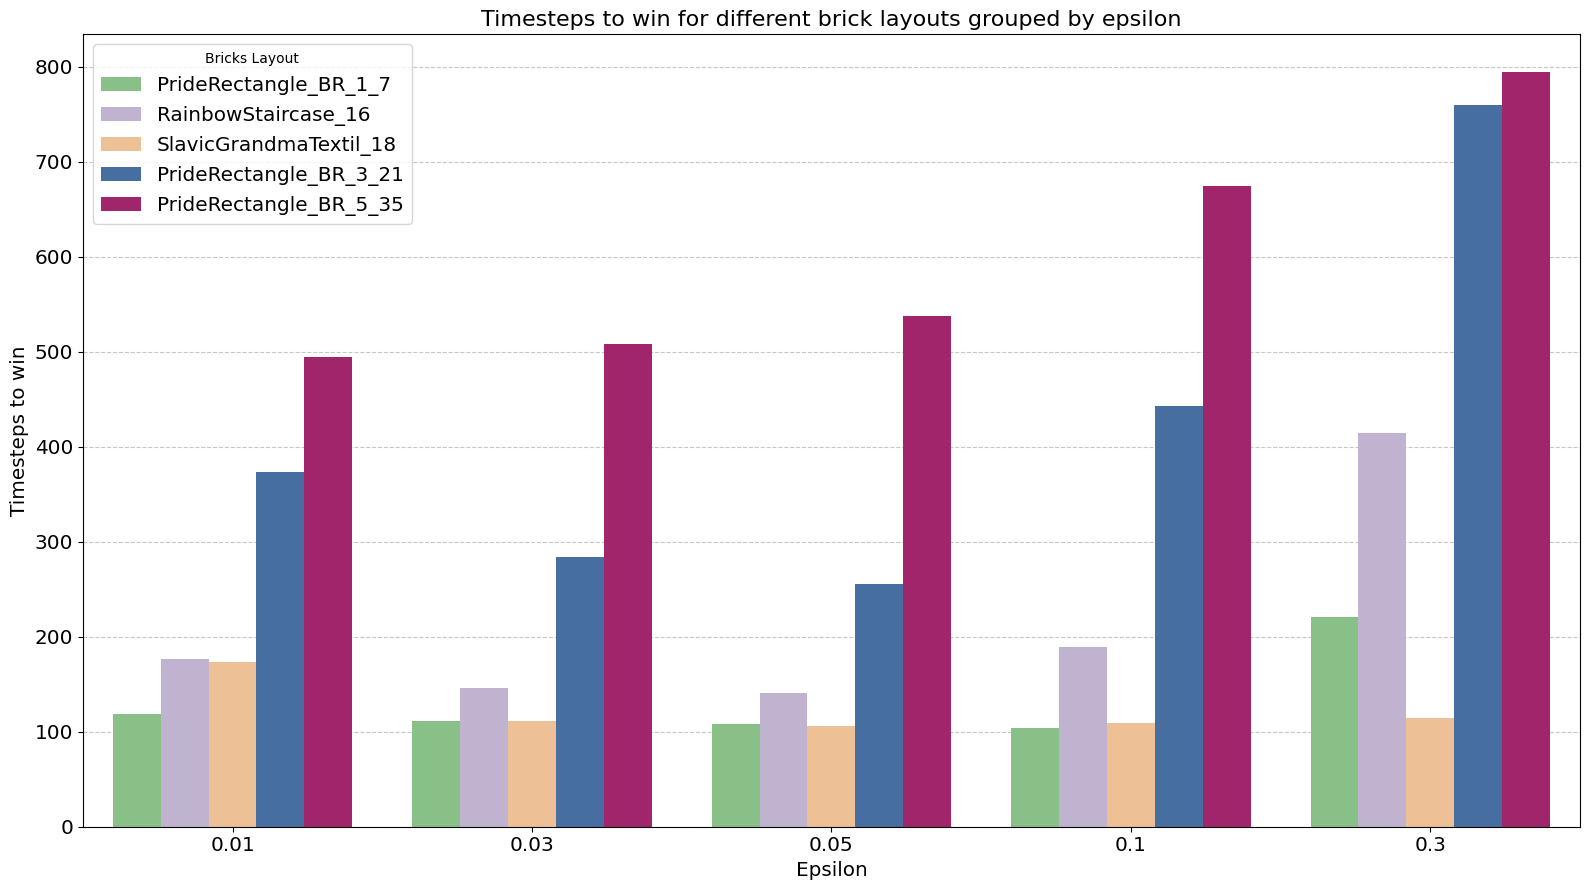

In [566]:

sns.barplot(x='start_epsilon', y='timestamps_to_win', hue='bricks_layout', data=grouped_df.sort_values(['brick_length']), palette=color, dodge=True)
plt.xlabel('Epsilon')
plt.ylabel('Timesteps to win')
plt.title('Timesteps to win for different brick layouts grouped by epsilon', fontsize=16)
plt.legend(title='Bricks Layout', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

sns.barplot(x='start_epsilon', y='policy_found_in_s', hue='bricks_layout', data=grouped_df.sort_values(['brick_length']), palette=color, dodge=True)
plt.xlabel('Start Epsilon')
plt.ylabel('Policy Found (s)')
plt.title('Time for policy found in (s) for different brick layouts grouped by epsilon', fontsize=16)
plt.legend(title='Bricks Layout', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
#TODO save 2 plots  fic fucking timesteps

/tmp/ipykernel_68943/2856653607.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


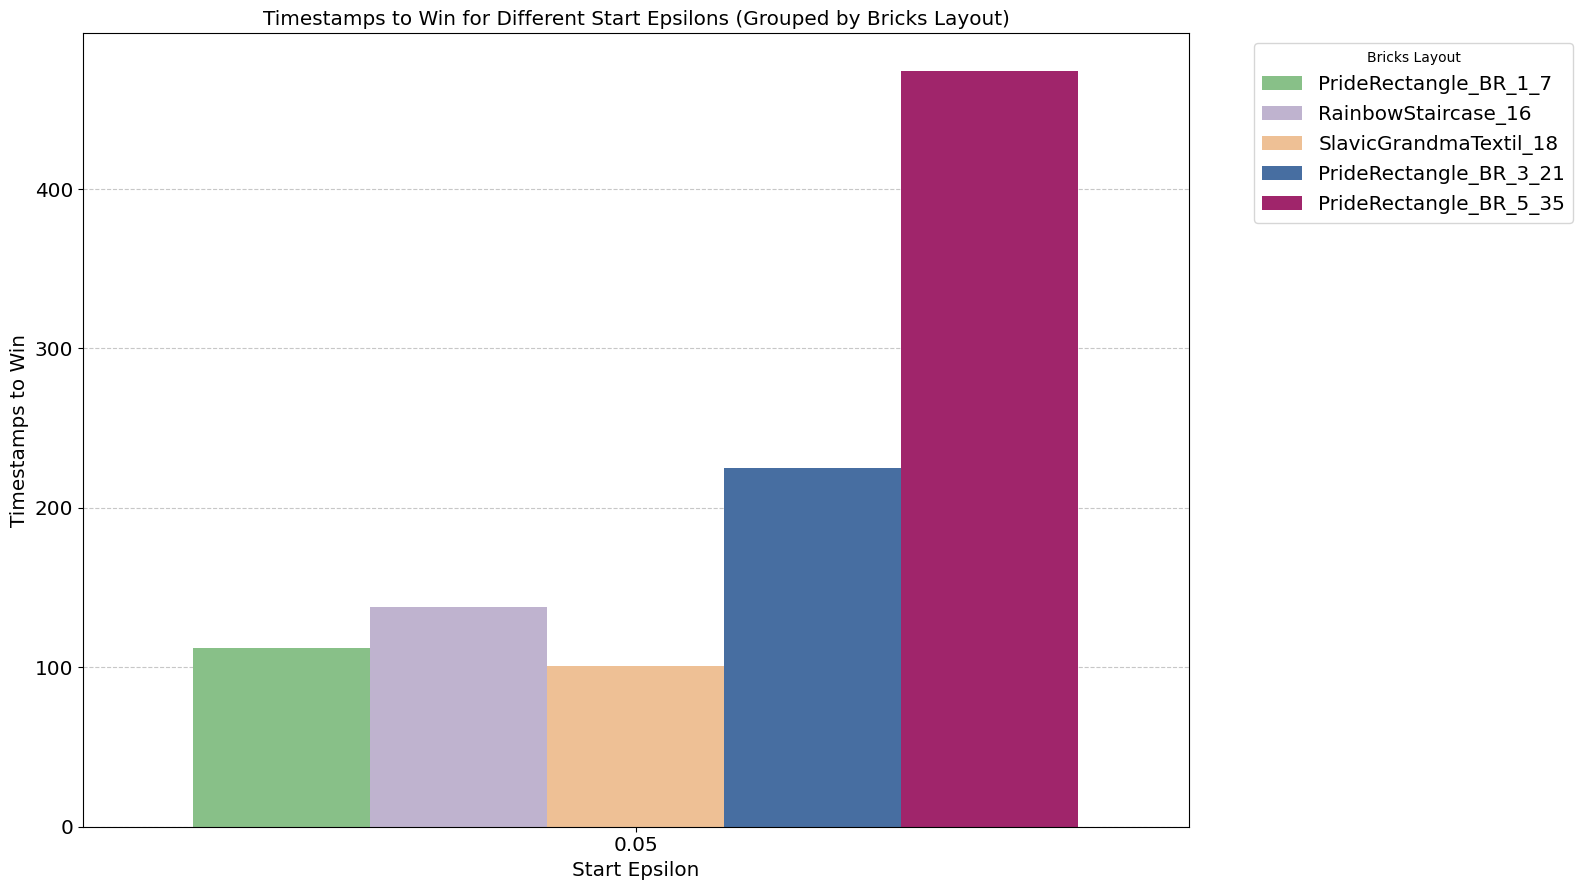

In [567]:
grouped_df = combined_df.groupby(['start_epsilon','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df

sns.barplot(
    x='start_epsilon', 
    y='timestamps_to_win', 
    hue='bricks_layout', 
    data=grouped_df[grouped_df['start_epsilon'] == 0.05].sort_values(['brick_length']), 
    palette=color, 
    dodge=True)
plt.xlabel('Start Epsilon')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win for Different Start Epsilons (Grouped by Bricks Layout)')
plt.legend(title='Bricks Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

sns.barplot(
    x='start_epsilon', 
    y='policy_found_in_s', 
    hue='bricks_layout', 
    data=grouped_df[grouped_df['start_epsilon'] == 0.05].sort_values(['brick_length']), 
    palette=color, 
    dodge=True)
plt.xlabel('Start Epsilon')
plt.ylabel('Policy Found (s)')
plt.title('Policy Found Time for Different Start Epsilons (Grouped by Bricks Layout)')
plt.legend(title='Bricks Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# GAMMA EXPERIMENTS

## OVER EPISODES

In [568]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/PrideRectangle_BR_gamma_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/RainbowStaircase_gamma_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/SlavicGrandmaTextil_gamma_main_experiments.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

Unnamed: 0           bricks_layout  ball_start_x  timestamps_to_win  \
0               0  PrideRectangle_BR_3_21            -2               1000   
1               1  PrideRectangle_BR_3_21            -1               1000   
2               2  PrideRectangle_BR_3_21             0               1000   
3               3  PrideRectangle_BR_3_21             1               1000   
4               4  PrideRectangle_BR_3_21             2               1000   
...           ...                     ...           ...                ...   
23995        1995  SlavicGrandmaTextil_18            -2                119   
23996        1996  SlavicGrandmaTextil_18            -1                122   
23997        1997  SlavicGrandmaTextil_18             0                117   
23998        1998  SlavicGrandmaTextil_18             1                158   
23999        1999  SlavicGrandmaTextil_18             2                102   

       gamma  start_epsilon   epsilon  max_episode_num  current_episode_num  \
0       0.98           0.05  0.049876            40000                  100   
1       0.98           0.05  0.049876            40000                  100   
2       0.98           0.05  0.049876            40000                  100   
3       0.98           0.05  0.049876            40000                  100   
4       0.98           0.05  0.049876            40000                  100   
...      ...            ...       ...              ...                  ...   
23995   0.95           0.05  0.018394            40000                40000   
23996   0.95           0.05  0.018394            40000                40000   
23997   0.95           0.05  0.018394            40000                40000   
23998   0.95           0.05  0.018394            40000                40000   
23999   0.95           0.05  0.018394            40000                40000   

      reward_system  policy_found_in_s  brick_length  run  
0            normal                  0            21    1  
1            normal                  0            21    1  
2            normal                  0            21    1  
3            normal                  0            21    1  
4            normal                  0            21    1  
...             ...                ...           ...  ...  
23995        normal                  0            18    1  
23996        normal                  0            18    1  
23997        normal                  0            18    1  
23998        normal                  0            18    1  
23999        normal                  0            18    1  

[120000 rows x 13 columns]

In [569]:
grouped_df = combined_df.groupby(['current_episode_num','gamma','bricks_layout'])['timestamps_to_win'].mean().reset_index()
grouped_df

current_episode_num  gamma           bricks_layout  timestamps_to_win
0                     100    0.9   PrideRectangle_BR_1_7        1000.000000
1                     100    0.9  PrideRectangle_BR_3_21        1000.000000
2                     100    0.9  PrideRectangle_BR_5_35        1000.000000
3                     100    0.9     RainbowStaircase_16         983.266667
4                     100    0.9  SlavicGrandmaTextil_18         642.400000
...                   ...    ...                     ...                ...
7995                40000    1.0   PrideRectangle_BR_1_7         725.266667
7996                40000    1.0  PrideRectangle_BR_3_21         736.800000
7997                40000    1.0  PrideRectangle_BR_5_35        1000.000000
7998                40000    1.0     RainbowStaircase_16        1000.000000
7999                40000    1.0  SlavicGrandmaTextil_18        1000.000000

[8000 rows x 4 columns]

/tmp/ipykernel_68943/1083430813.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = grouped_df.groupby(['gamma', 'current_episode_num']).mean().reset_index()
/tmp/ipykernel_68943/1083430813.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


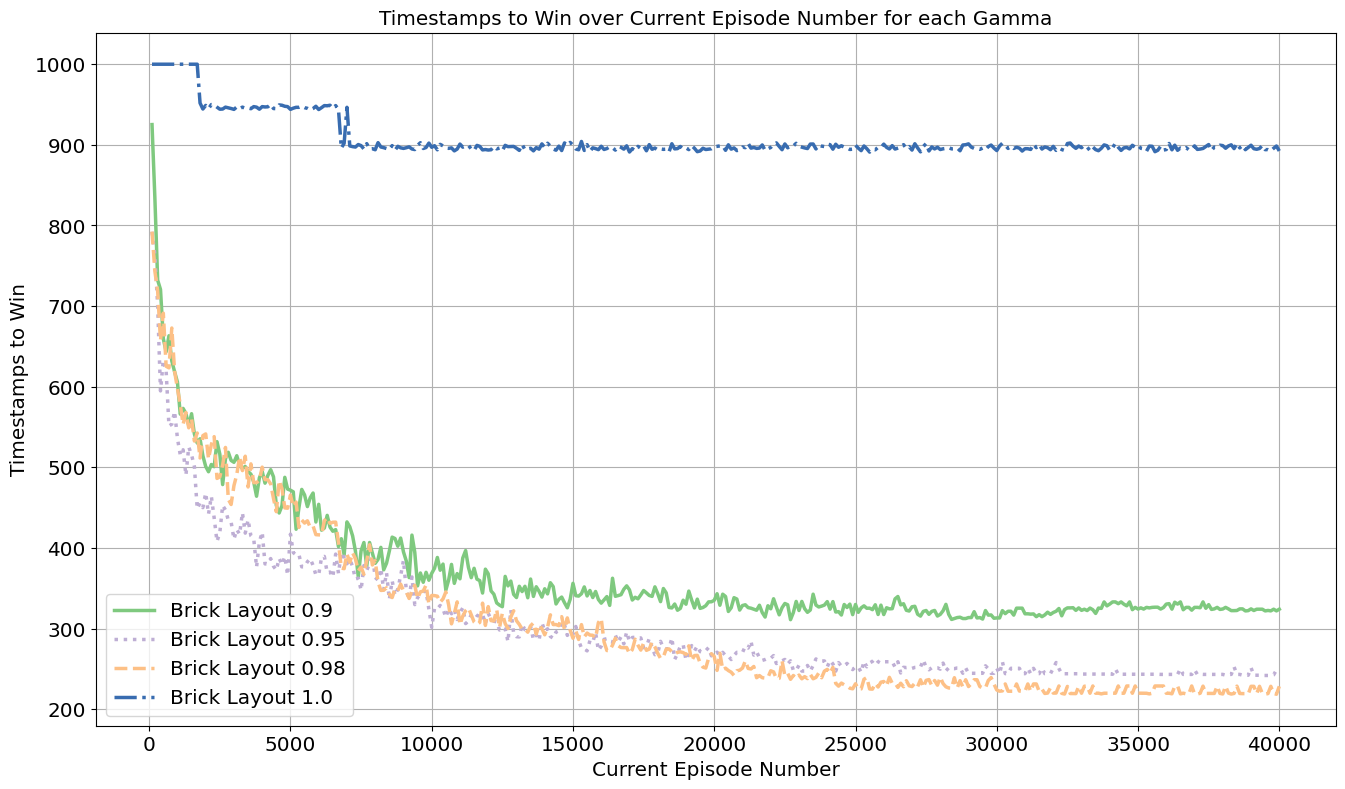

/tmp/ipykernel_68943/1083430813.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


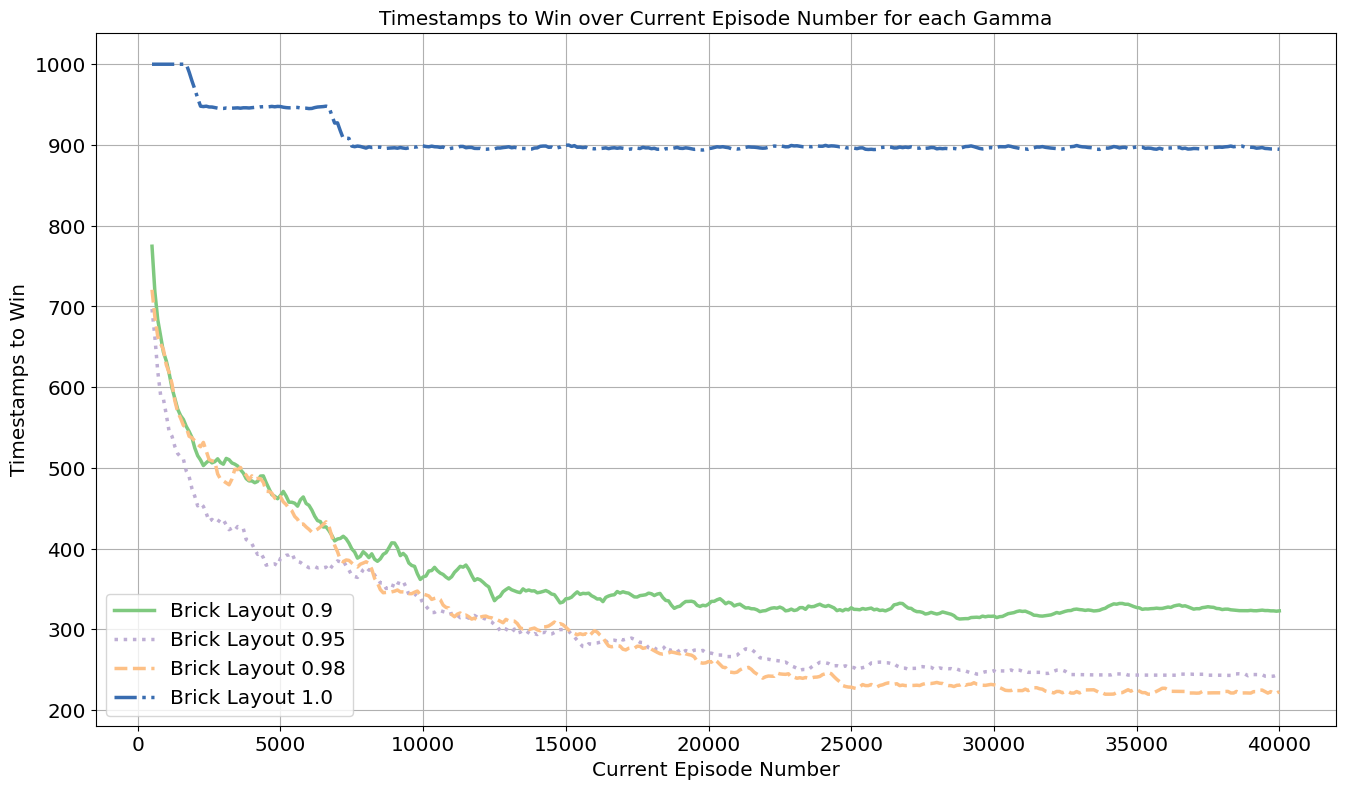

In [570]:
grouped_data = grouped_df.groupby(['gamma', 'current_episode_num']).mean().reset_index()

grouped_data = grouped_data.groupby(['gamma'])
for i, (gamma, group) in enumerate(grouped_data):
        # smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            group['timestamps_to_win'], 
            label=f'Brick Layout {gamma}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])


plt.xlabel('Current Episode Number')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win over Current Episode Number for each Gamma')
plt.grid(True)
plt.legend()
plt.show()

for i, (gamma, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Brick Layout {gamma}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

plt.xlabel('Current Episode Number')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win over Current Episode Number for each Gamma')
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_68943/2595906889.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


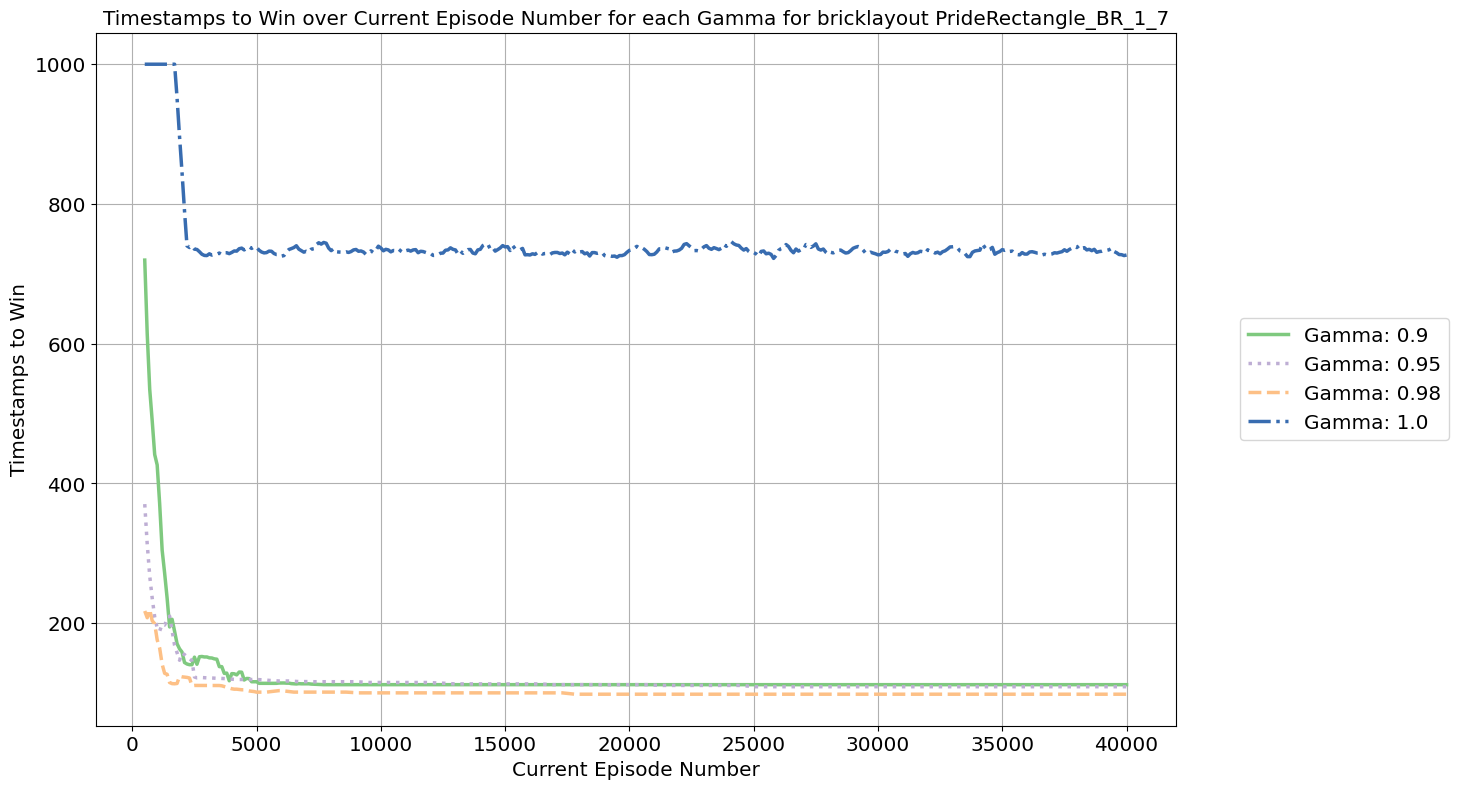

/tmp/ipykernel_68943/2595906889.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


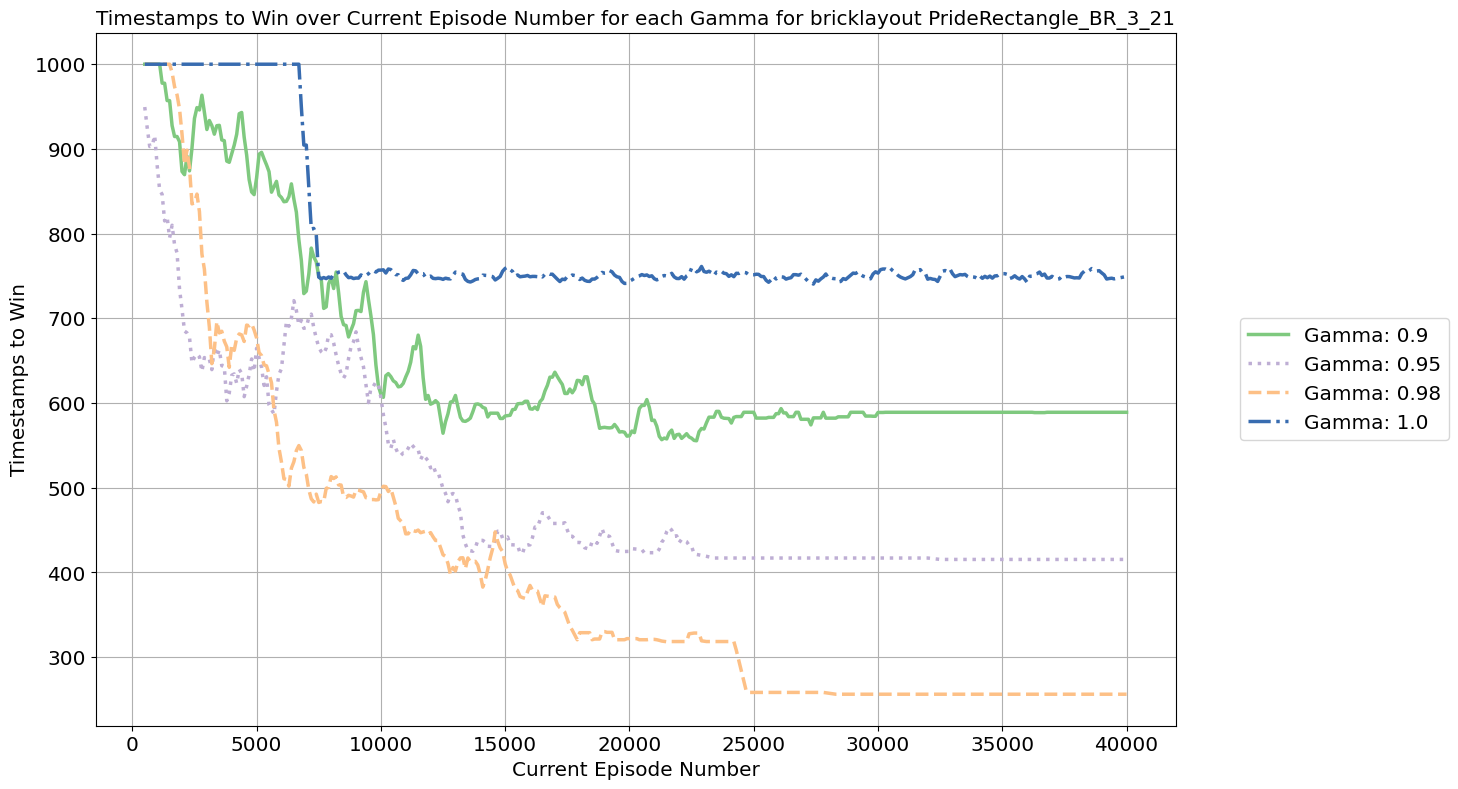

/tmp/ipykernel_68943/2595906889.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


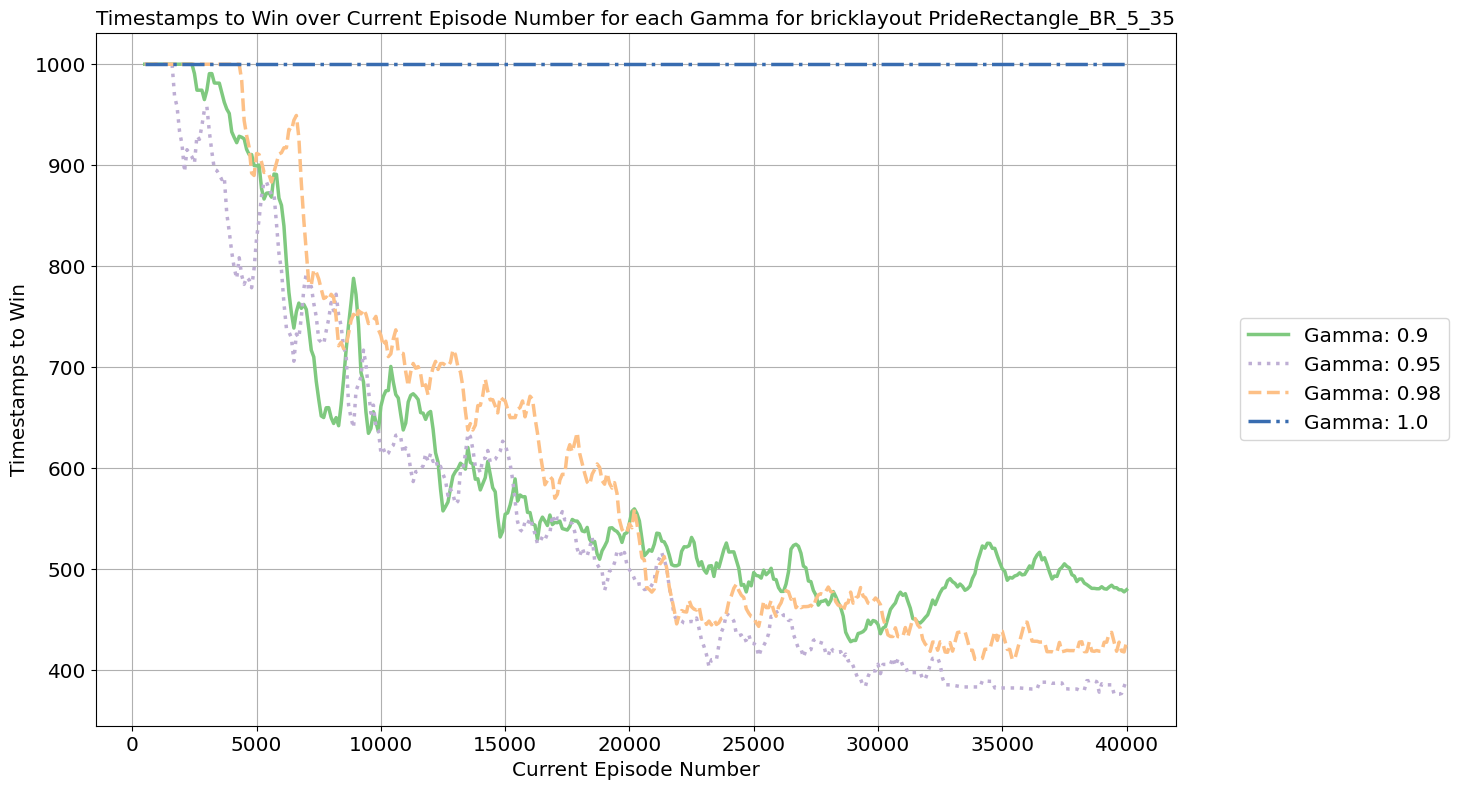

/tmp/ipykernel_68943/2595906889.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


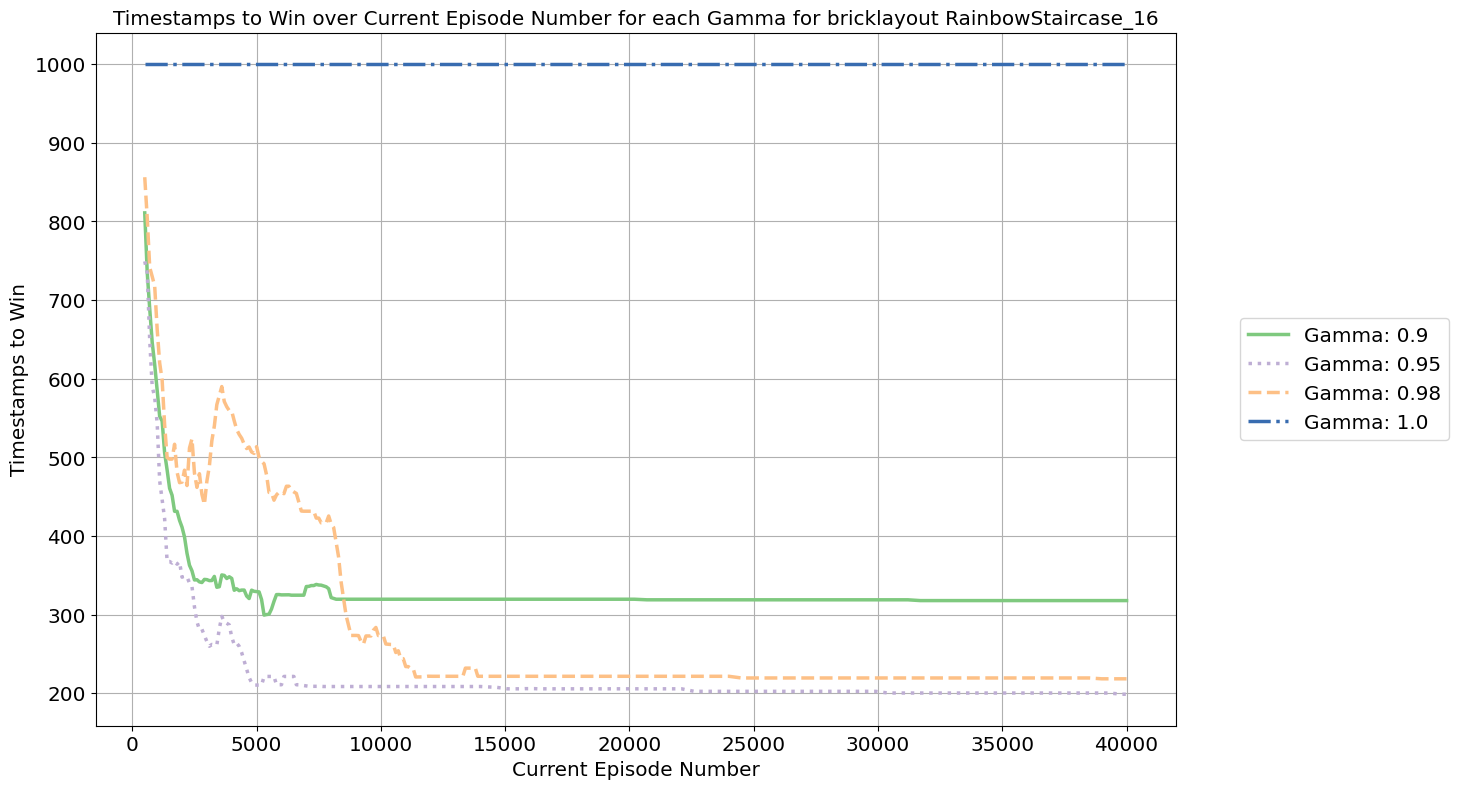

/tmp/ipykernel_68943/2595906889.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):


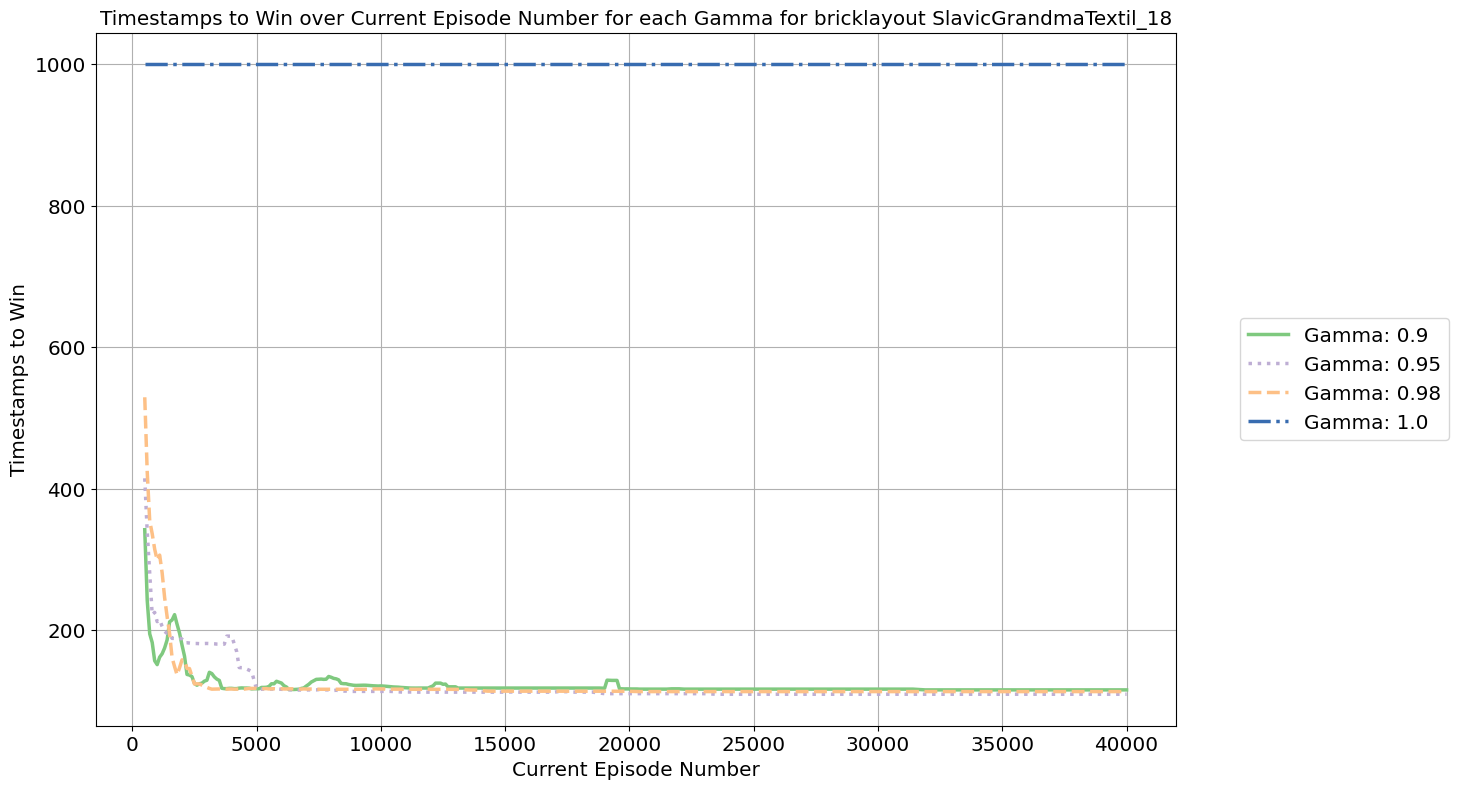

In [571]:
# df = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/eps/PrideRectangle_BR_eps_main_experiments.csv')
grouped_df = combined_df.groupby(['current_episode_num','gamma','bricks_layout'])['timestamps_to_win'].mean().reset_index()

for bricks in grouped_df['bricks_layout'].unique():
    filtered_df = grouped_df[grouped_df['bricks_layout'] == bricks]
    grouped_data = filtered_df.groupby(['gamma'])

    for i, (gamma, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Gamma: {gamma}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    plt.xlabel('Current Episode Number')
    plt.ylabel('Timestamps to Win')
    plt.title(f'Timestamps to Win over Current Episode Number for each Gamma for bricklayout {bricks}')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')    
    plt.subplots_adjust(right=0.8)  
    plt.show()
    
#TODO save 4 plots 

/tmp/ipykernel_68943/1686189746.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/1686189746.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/1686189746.py:20: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (gamma, group) in enumerate(grouped_data):
/tmp/ipykernel_68943/1686189746.py:20: FutureWarning: In a future vers

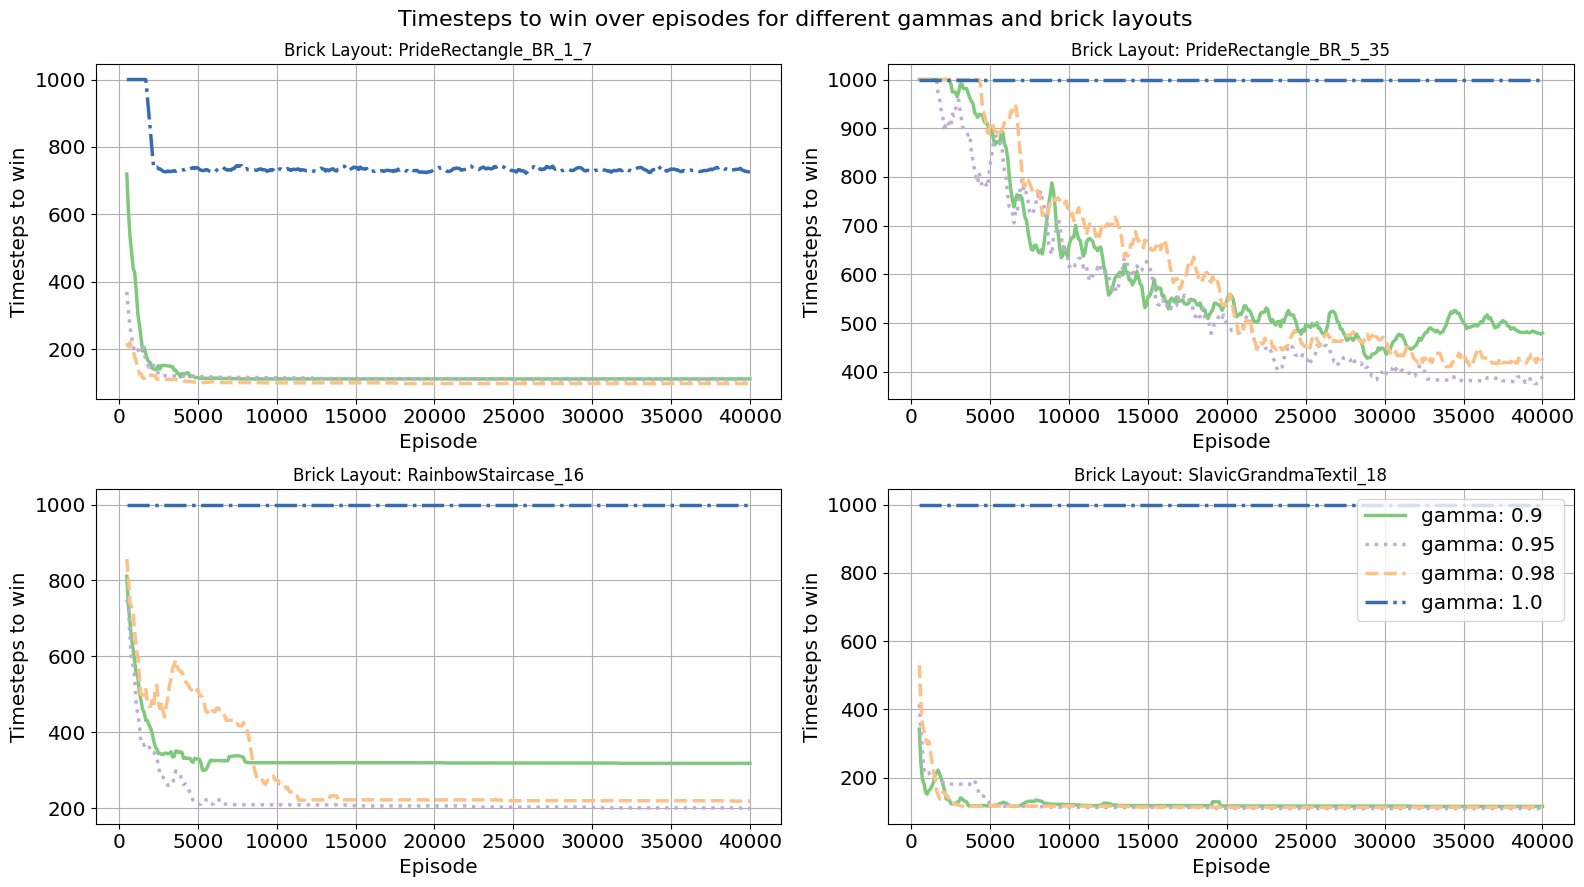

In [572]:
import matplotlib.pyplot as plt

grouped_df = combined_df.groupby(['current_episode_num', 'gamma', 'bricks_layout'])['timestamps_to_win'].mean().reset_index()

# Get unique bricks_layout except 'PrideRectangle_BR_3_21'
brick_layouts = [bricks for bricks in grouped_df['bricks_layout'].unique() if bricks != 'PrideRectangle_BR_3_21']

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(16, 9))

# Define colors and line styles (modify as needed)

fig.suptitle('Timesteps to win over episodes for different gammas and brick layouts', fontsize=16)

for idx, bricks in enumerate(brick_layouts):
    ax = axs[idx // 2, idx % 2]  # Get the correct subplot
    filtered_df = grouped_df[grouped_df['bricks_layout'] == bricks]
    grouped_data = filtered_df.groupby(['gamma'])

    for i, (gamma, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        ax.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'gamma: {gamma}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    ax.set_xlabel('Episode')
    ax.set_ylabel('Timesteps to win')
    ax.set_title(f'Brick Layout: {bricks}', fontsize=12)  # Add the brick layout as a subtitle
    ax.grid(True)
    
    if idx == 3:  # Add legend only to the first subplot
        ax.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()

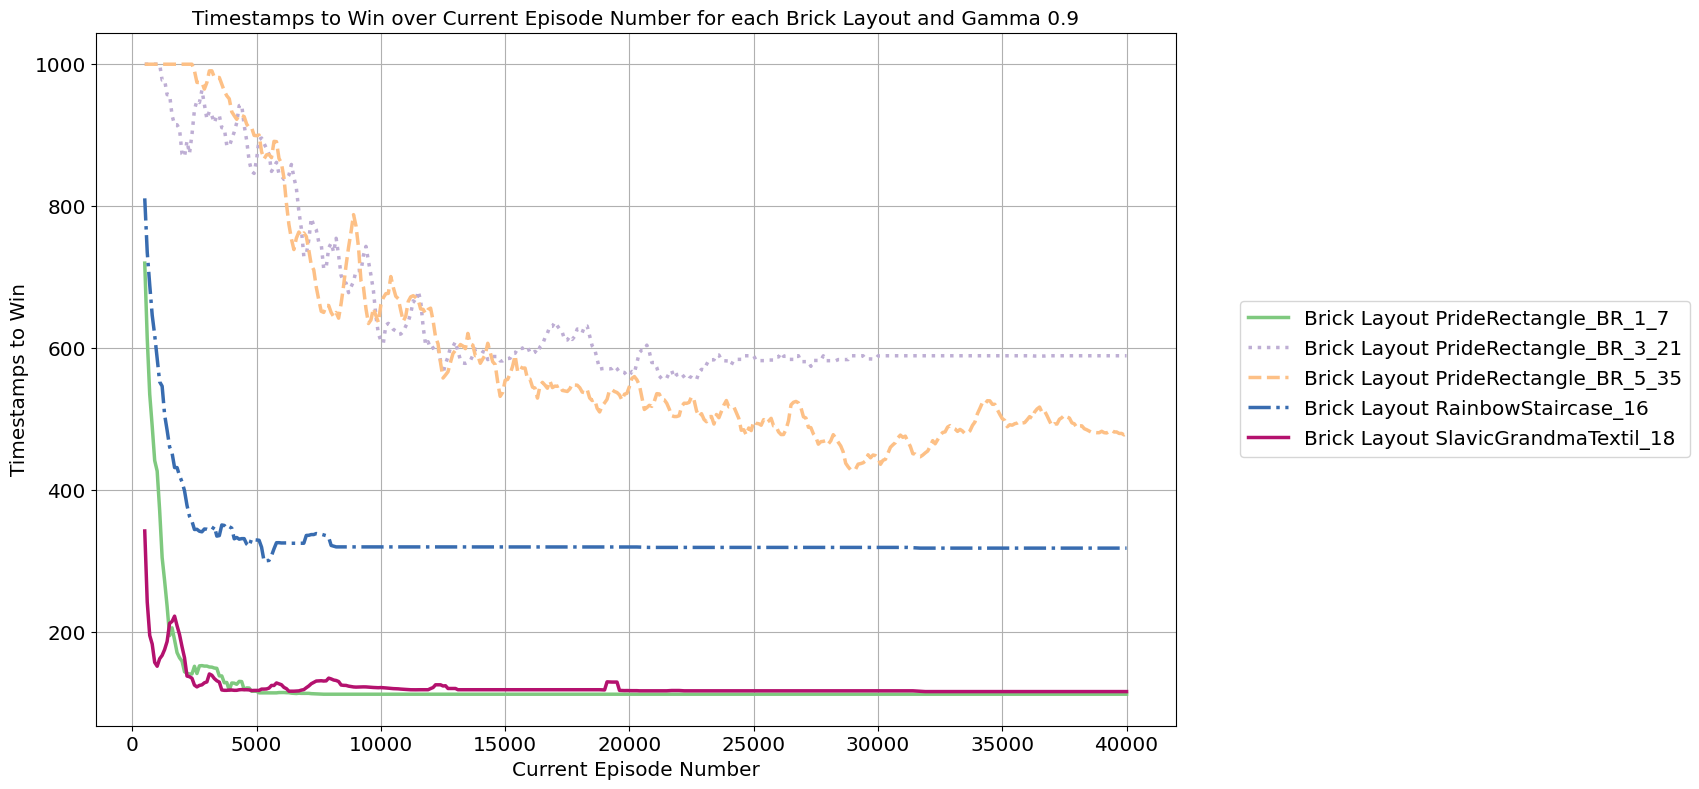

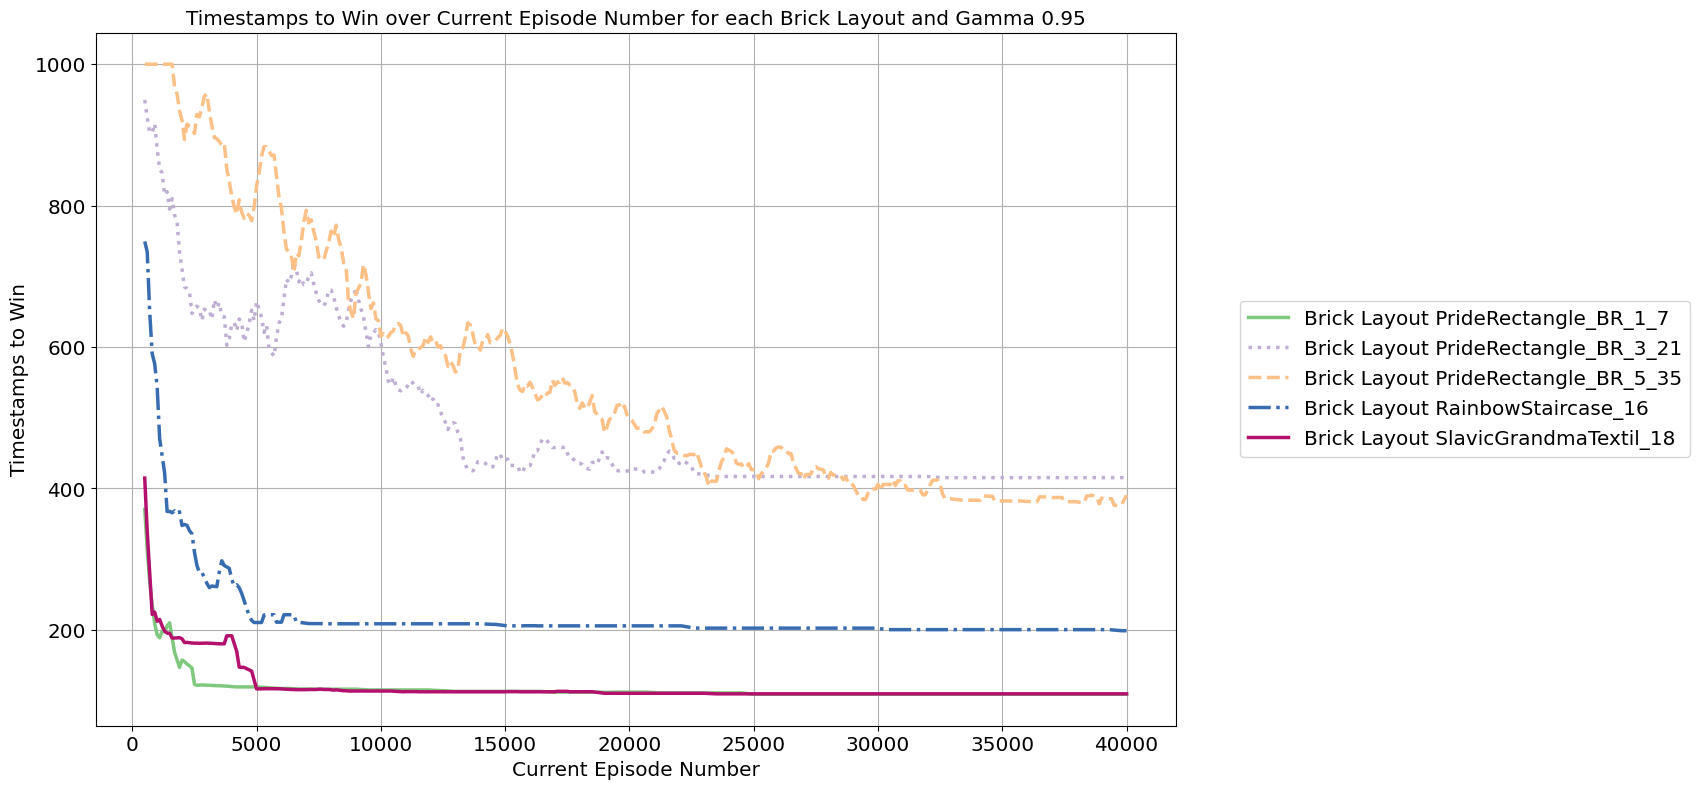

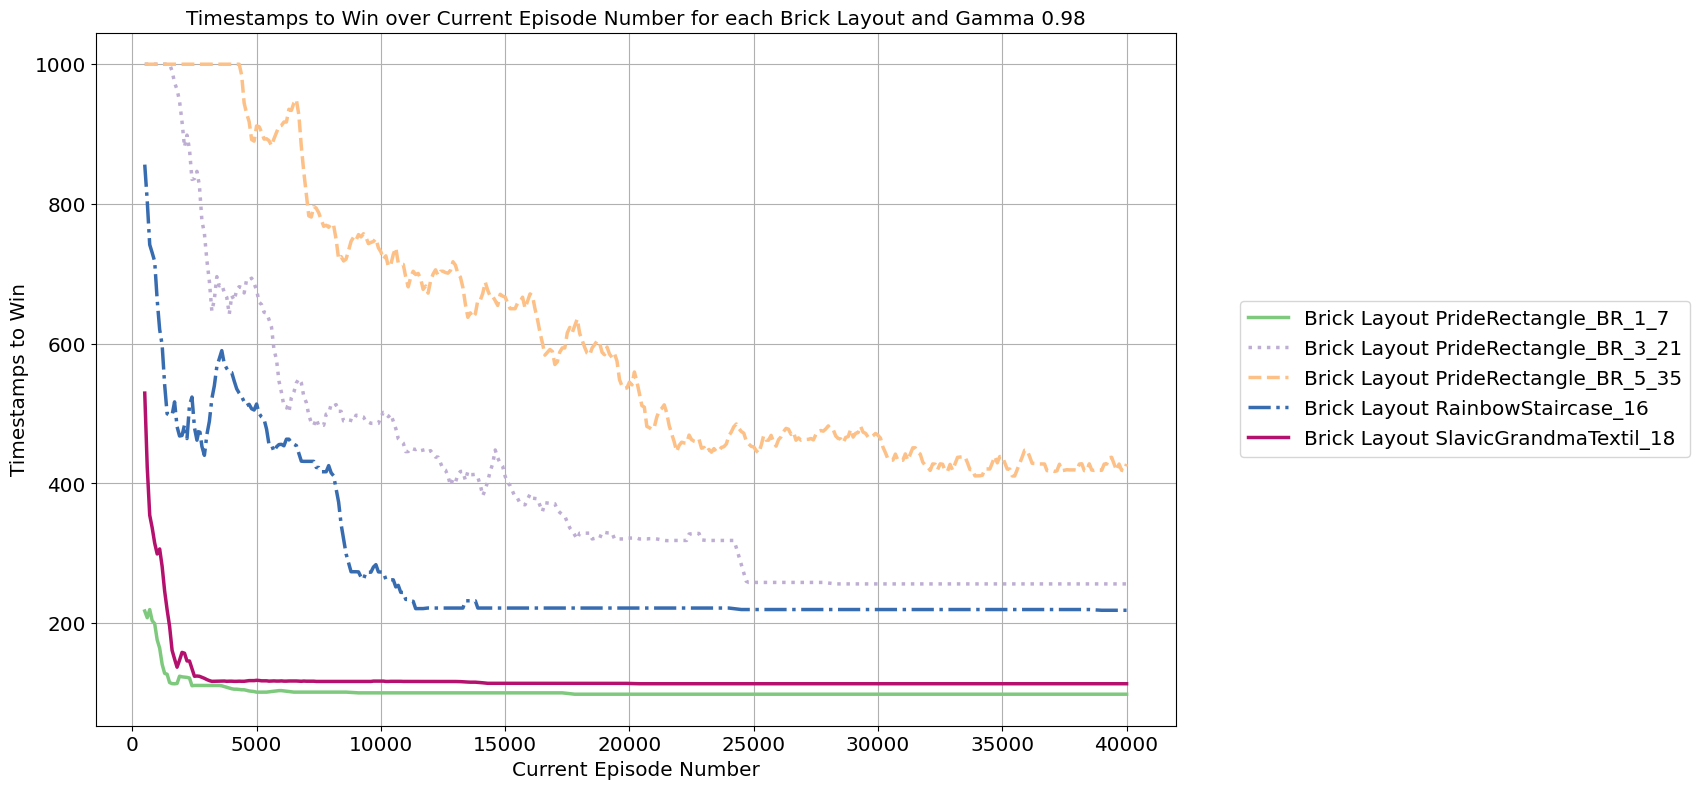

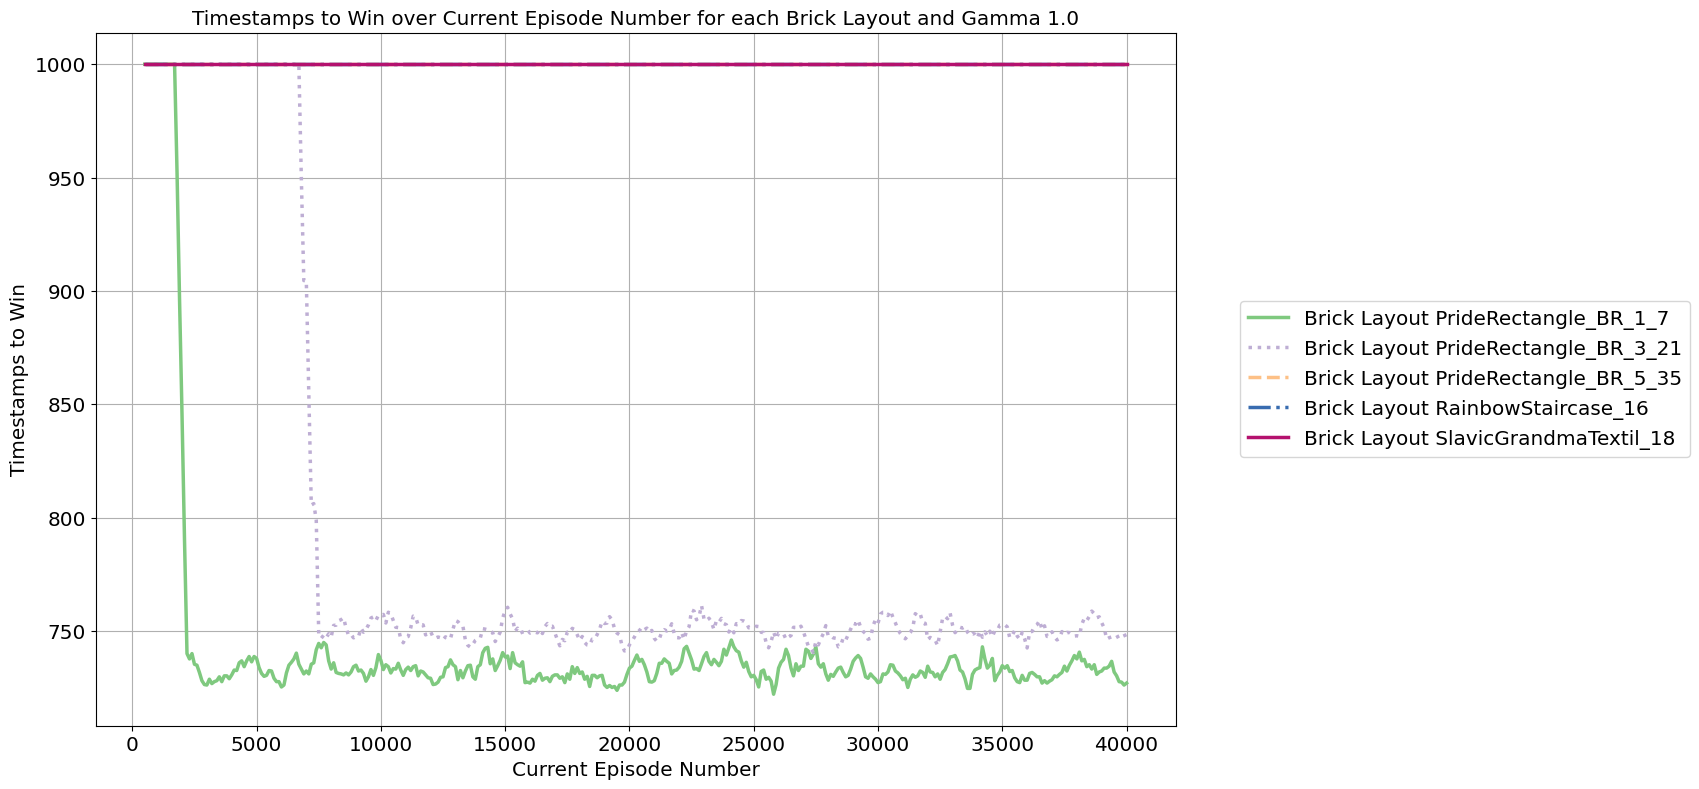

In [573]:
for gamma in grouped_df['gamma'].unique():
    filtered_df = grouped_df[grouped_df['gamma'] == gamma]

    grouped_data = filtered_df.groupby(['gamma','bricks_layout'])
    grouped_data 

    for i, (gamma, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'Brick Layout {gamma[1]}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    plt.xlabel('Current Episode Number')
    plt.ylabel('Timestamps to Win')
    plt.title(f'Timestamps to Win over Current Episode Number for each Brick Layout and Gamma {gamma[0]}')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')    
    plt.subplots_adjust(right=0.8)  
    plt.show()
#TODO save 2 plots 0.98, 1.0

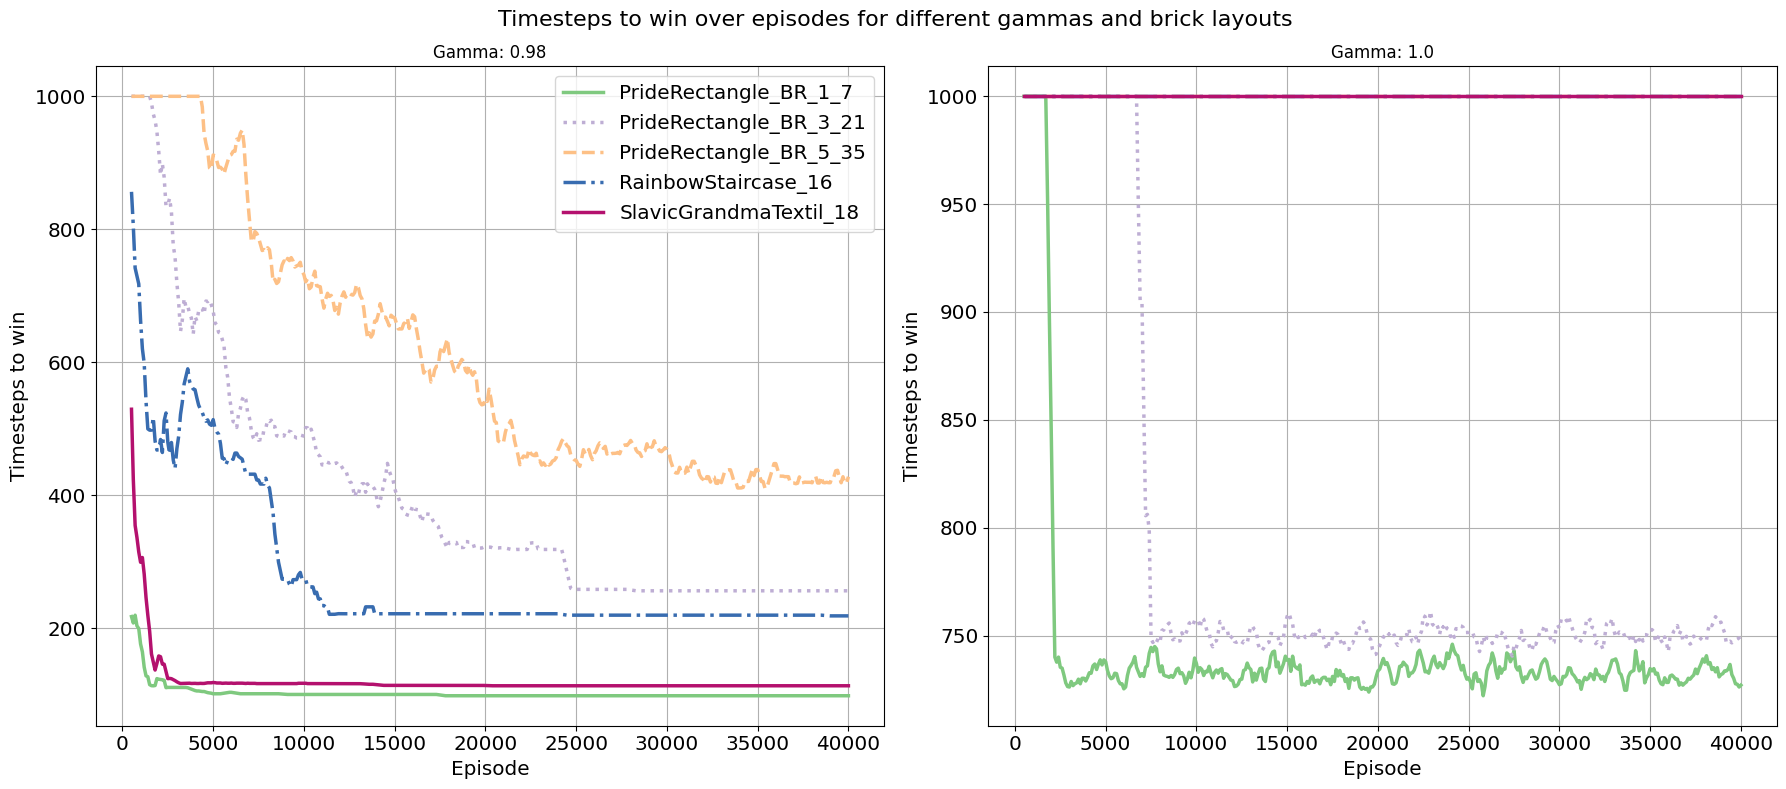

In [574]:
grouped_df = combined_df.groupby(['current_episode_num', 'gamma', 'bricks_layout'])['timestamps_to_win'].mean().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Set main title for the entire figure
fig.suptitle('Timesteps to win over episodes for different gammas and brick layouts', fontsize=16)

# for eps in [0.01, 0.03, 0.05, 0.1, 0.3]:
for idx, gamma in enumerate([0.98, 1.0]):
    ax = axs[idx]  # Get the correct subplot
    filtered_df = grouped_df[grouped_df['gamma'] == gamma]

    grouped_data = filtered_df.groupby(['gamma', 'bricks_layout'])
    grouped_data 

    for i, (gamma, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        ax.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'{gamma[1]}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

    ax.set_xlabel('Episode')
    ax.set_ylabel('Timesteps to win')
    ax.set_title(f'Gamma: {gamma[0]}', fontsize=12)  # Add epsilon value as a subtitle
    ax.grid(True)
    
    if idx == 0:  # Add legend only to the first subplot
        ax.legend(loc='upper right')

# Adjust the space between subplots
plt.tight_layout()

# Display the plots
plt.show()

## ENDSTATES

In [575]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/PrideRectangle_BR_gamma_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/RainbowStaircase_gamma_main_experiments.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/SlavicGrandmaTextil_gamma_main_experiments.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length', 'current_episode_num'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df = grouped_df[grouped_df['current_episode_num'] == 40000]
grouped_df = grouped_df.sort_values(['gamma', 'bricks_layout'])
grouped_df_timestep = grouped_df
grouped_df_timestep

/tmp/ipykernel_68943/2627468831.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length', 'current_episode_num'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


gamma           bricks_layout  brick_length  current_episode_num  \
399    0.90   PrideRectangle_BR_1_7             7                40000   
799    0.90  PrideRectangle_BR_3_21            21                40000   
1199   0.90  PrideRectangle_BR_5_35            35                40000   
1599   0.90     RainbowStaircase_16            16                40000   
1999   0.90  SlavicGrandmaTextil_18            18                40000   
2399   0.95   PrideRectangle_BR_1_7             7                40000   
2799   0.95  PrideRectangle_BR_3_21            21                40000   
3199   0.95  PrideRectangle_BR_5_35            35                40000   
3599   0.95     RainbowStaircase_16            16                40000   
3999   0.95  SlavicGrandmaTextil_18            18                40000   
4399   0.98   PrideRectangle_BR_1_7             7                40000   
4799   0.98  PrideRectangle_BR_3_21            21                40000   
5199   0.98  PrideRectangle_BR_5_35            35                40000   
5599   0.98     RainbowStaircase_16            16                40000   
5999   0.98  SlavicGrandmaTextil_18            18                40000   
6399   1.00   PrideRectangle_BR_1_7             7                40000   
6799   1.00  PrideRectangle_BR_3_21            21                40000   
7199   1.00  PrideRectangle_BR_5_35            35                40000   
7599   1.00     RainbowStaircase_16            16                40000   
7999   1.00  SlavicGrandmaTextil_18            18                40000   

      timestamps_to_win  policy_found_in_s  
399          112.000000                0.0  
799          589.066667                0.0  
1199         485.333333                0.0  
1599         317.933333                0.0  
1999         115.733333                0.0  
2399         109.066667                0.0  
2799         415.333333                0.0  
3199         410.133333                0.0  
3599         198.866667                0.0  
3999         109.600000                0.0  
4399          98.333333                0.0  
4799         256.200000                0.0  
5199         455.466667                0.0  
5599         218.466667                0.0  
5999         113.333333                0.0  
6399         725.266667                0.0  
6799         736.800000                0.0  
7199        1000.000000                0.0  
7599        1000.000000                0.0  
7999        1000.000000                0.0

In [576]:
# List of filenames containing the data
filenames = ['/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/PrideRectangle_BR_gamma_policy_times.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/RainbowStaircase_gamma_policy_times.csv', 
             '/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/gamma/SlavicGrandmaTextil_gamma_policy_times.csv']


# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Read data from each file and append it to the combined DataFrame
for filename in filenames:
    df = pd.read_csv(filename)
    combined_df = pd.concat([combined_df, df])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df = combined_df.sort_values(['brick_length'])
combined_df

Unnamed: 0           bricks_layout  ball_start_x  timestamps_to_win  \
17           1   PrideRectangle_BR_1_7             2                 98   
19           3   PrideRectangle_BR_1_7             2               1000   
20           0   PrideRectangle_BR_1_7             2                 98   
21           1   PrideRectangle_BR_1_7             2                126   
22           2   PrideRectangle_BR_1_7             2                 94   
23           3   PrideRectangle_BR_1_7             2                147   
24           0   PrideRectangle_BR_1_7             2                 96   
18           2   PrideRectangle_BR_1_7             2                 92   
25           1   PrideRectangle_BR_1_7             2                108   
27           3   PrideRectangle_BR_1_7             2               1000   
26           2   PrideRectangle_BR_1_7             2                 92   
16           0   PrideRectangle_BR_1_7             2                 92   
6            2     RainbowStaircase_16             2                214   
5            1     RainbowStaircase_16             2                130   
4            0     RainbowStaircase_16             2                142   
3            3     RainbowStaircase_16             2               1000   
2            2     RainbowStaircase_16             2               1000   
0            0     RainbowStaircase_16             2               1000   
7            3     RainbowStaircase_16             2               1000   
8            0     RainbowStaircase_16             2               1000   
9            1     RainbowStaircase_16             2                155   
10           2     RainbowStaircase_16             2                 95   
11           3     RainbowStaircase_16             2               1000   
1            1     RainbowStaircase_16             2                146   
9            1  SlavicGrandmaTextil_18             2                102   
8            0  SlavicGrandmaTextil_18             2                102   
7            7  SlavicGrandmaTextil_18             2               1000   
6            6  SlavicGrandmaTextil_18             2                102   
10           2  SlavicGrandmaTextil_18             2                103   
3            3  SlavicGrandmaTextil_18             2               1000   
4            4  SlavicGrandmaTextil_18             2                114   
2            2  SlavicGrandmaTextil_18             2                102   
1            1  SlavicGrandmaTextil_18             2                102   
0            0  SlavicGrandmaTextil_18             2                102   
5            5  SlavicGrandmaTextil_18             2                102   
11           3  SlavicGrandmaTextil_18             2               1000   
29           1  PrideRectangle_BR_3_21             2               1000   
34           2  PrideRectangle_BR_3_21             2                232   
33           1  PrideRectangle_BR_3_21             2                247   
32           0  PrideRectangle_BR_3_21             2                214   
31           3  PrideRectangle_BR_3_21             2                204   
30           2  PrideRectangle_BR_3_21             2                226   
28           0  PrideRectangle_BR_3_21             2               1000   
15           3  PrideRectangle_BR_3_21             2               1000   
14           2  PrideRectangle_BR_3_21             2                196   
13           1  PrideRectangle_BR_3_21             2               1000   
12           0  PrideRectangle_BR_3_21             2                176   
35           3  PrideRectangle_BR_3_21             2               1000   
1            1  PrideRectangle_BR_5_35             2                252   
2            2  PrideRectangle_BR_5_35             2                314   
3            3  PrideRectangle_BR_5_35             2               1000   
4            4  PrideRectangle_BR_5_35             2                274   
5            5  PrideRectangl

In [577]:
grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df = grouped_df.sort_values(['gamma', 'bricks_layout'])
grouped_df['timestamps_to_win'] = grouped_df_timestep['timestamps_to_win'].to_numpy()
grouped_df


/tmp/ipykernel_68943/152615162.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


gamma           bricks_layout  brick_length  timestamps_to_win  \
0    0.90   PrideRectangle_BR_1_7             7         112.000000   
1    0.90  PrideRectangle_BR_3_21            21         589.066667   
2    0.90  PrideRectangle_BR_5_35            35         485.333333   
3    0.90     RainbowStaircase_16            16         317.933333   
4    0.90  SlavicGrandmaTextil_18            18         115.733333   
5    0.95   PrideRectangle_BR_1_7             7         109.066667   
6    0.95  PrideRectangle_BR_3_21            21         415.333333   
7    0.95  PrideRectangle_BR_5_35            35         410.133333   
8    0.95     RainbowStaircase_16            16         198.866667   
9    0.95  SlavicGrandmaTextil_18            18         109.600000   
10   0.98   PrideRectangle_BR_1_7             7          98.333333   
11   0.98  PrideRectangle_BR_3_21            21         256.200000   
12   0.98  PrideRectangle_BR_5_35            35         455.466667   
13   0.98     RainbowStaircase_16            16         218.466667   
14   0.98  SlavicGrandmaTextil_18            18         113.333333   
15   1.00   PrideRectangle_BR_1_7             7         725.266667   
16   1.00  PrideRectangle_BR_3_21            21         736.800000   
17   1.00  PrideRectangle_BR_5_35            35        1000.000000   
18   1.00     RainbowStaircase_16            16        1000.000000   
19   1.00  SlavicGrandmaTextil_18            18        1000.000000   

    policy_found_in_s  
0           20.000000  
1          146.666667  
2          259.000000  
3           70.000000  
4           29.666667  
5           19.666667  
6          137.000000  
7          263.333333  
8           62.666667  
9           30.000000  
10          16.333333  
11         141.000000  
12         255.000000  
13          76.666667  
14          32.000000  
15          53.000000  
16         178.333333  
17         266.666667  
18         179.000000  
19          87.333333

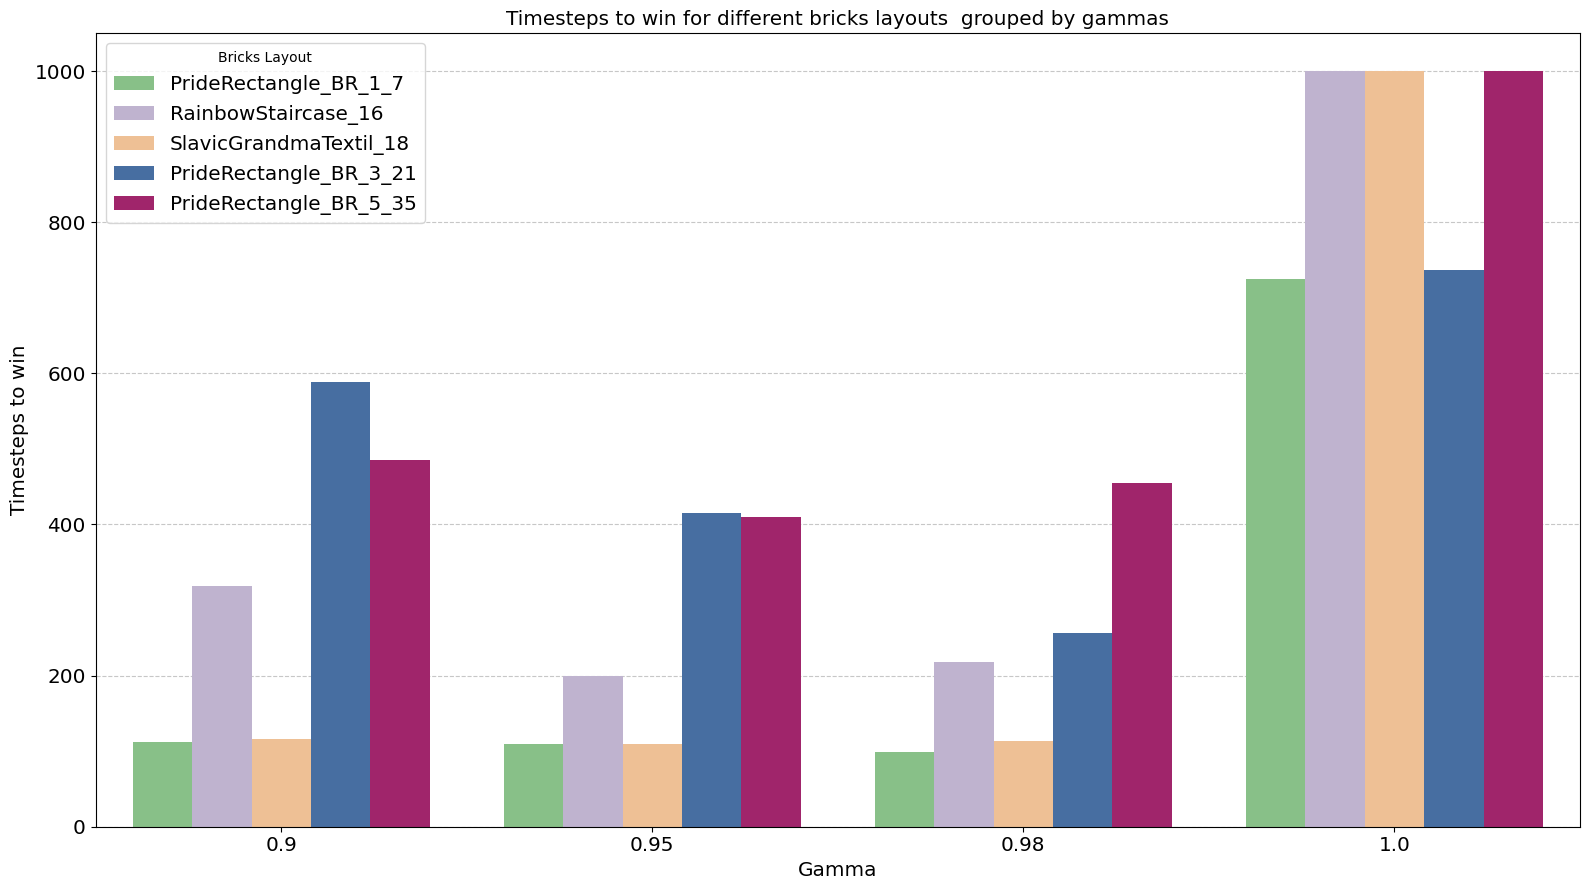

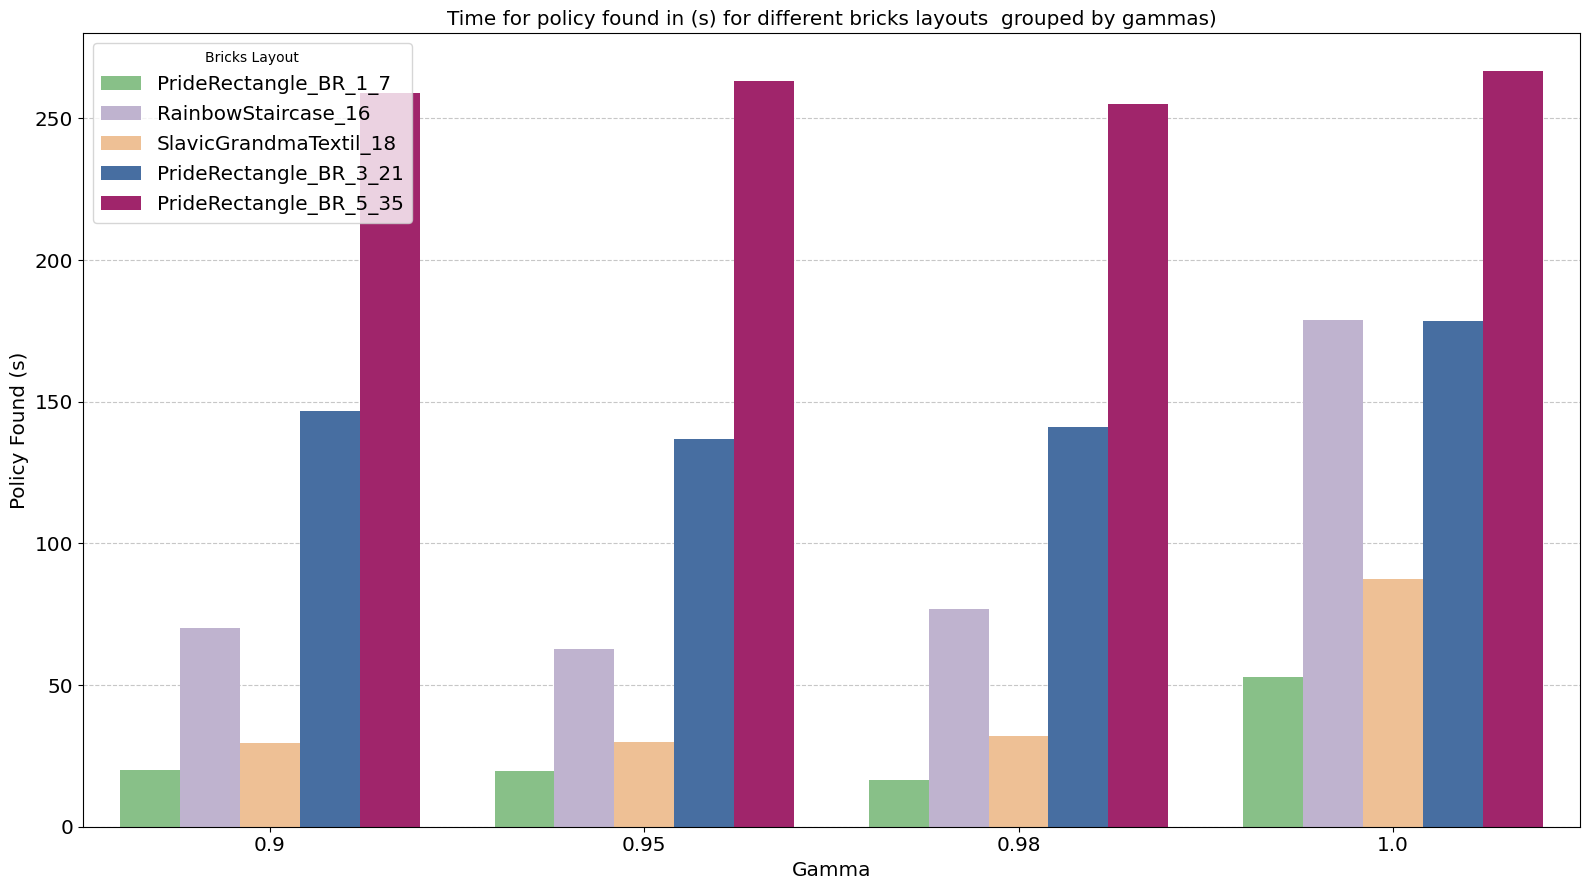

In [578]:

sns.barplot(x='gamma', y='timestamps_to_win', hue='bricks_layout', data=grouped_df.sort_values(['brick_length']), palette=color, dodge=True)
plt.xlabel('Gamma')
plt.ylabel('Timesteps to win')
plt.title('Timesteps to win for different bricks layouts  grouped by gammas')
plt.legend(title='Bricks Layout', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

sns.barplot(x='gamma', y='policy_found_in_s', hue='bricks_layout', data=grouped_df.sort_values(['brick_length']), palette=color, dodge=True)
plt.xlabel('Gamma')
plt.ylabel('Policy Found (s)')
plt.title('Time for policy found in (s) for different bricks layouts  grouped by gammas)')
plt.legend(title='Bricks Layout', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#TODO save 2 plots fix timesteps 

/tmp/ipykernel_68943/3556256058.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


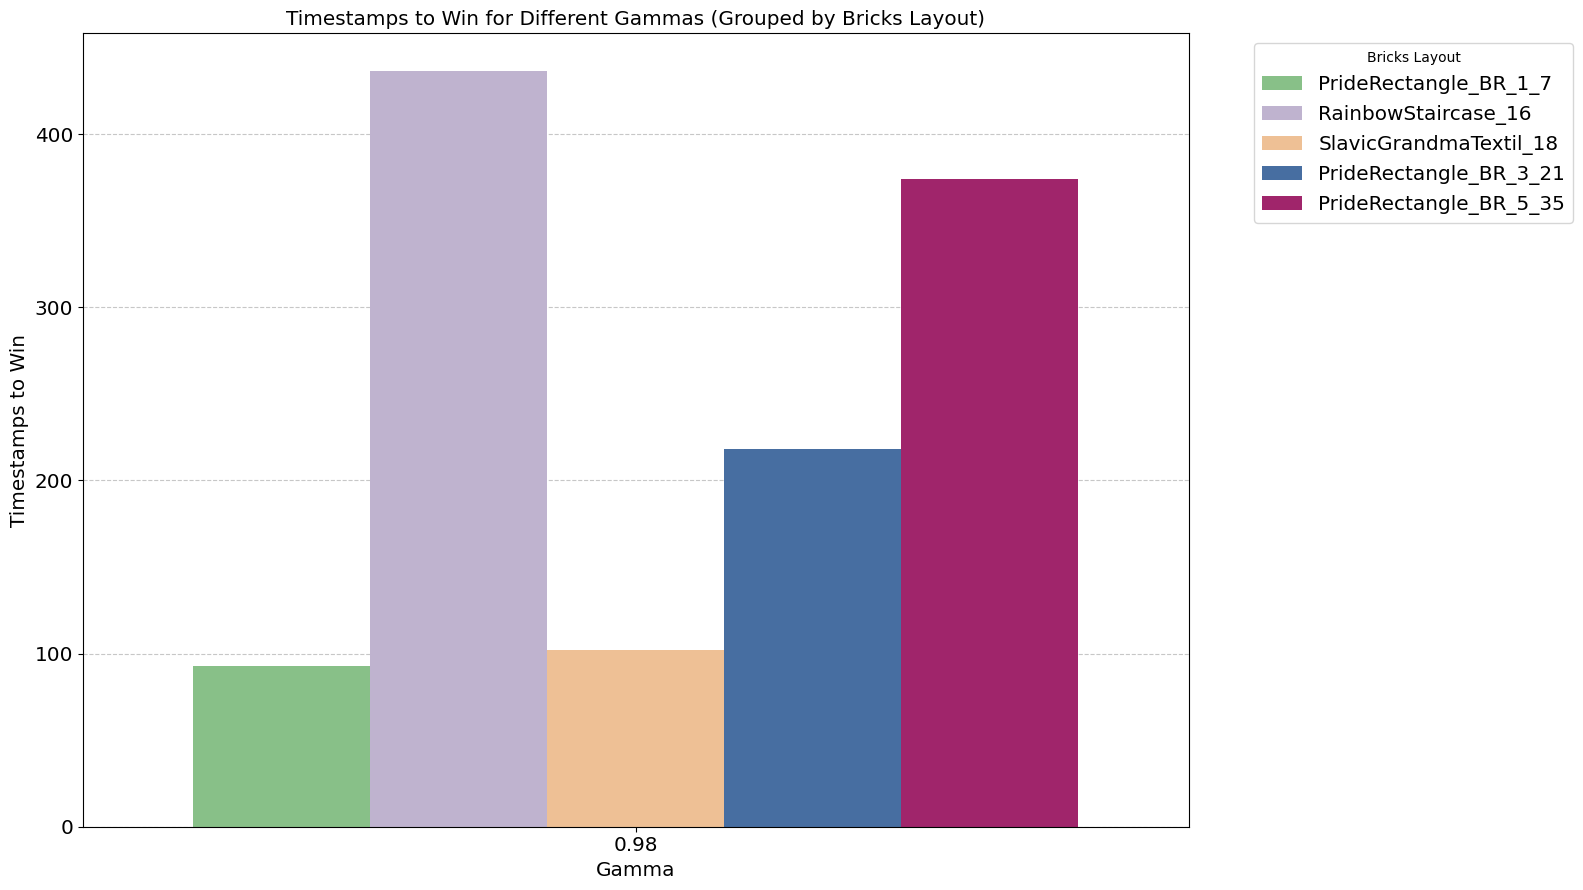

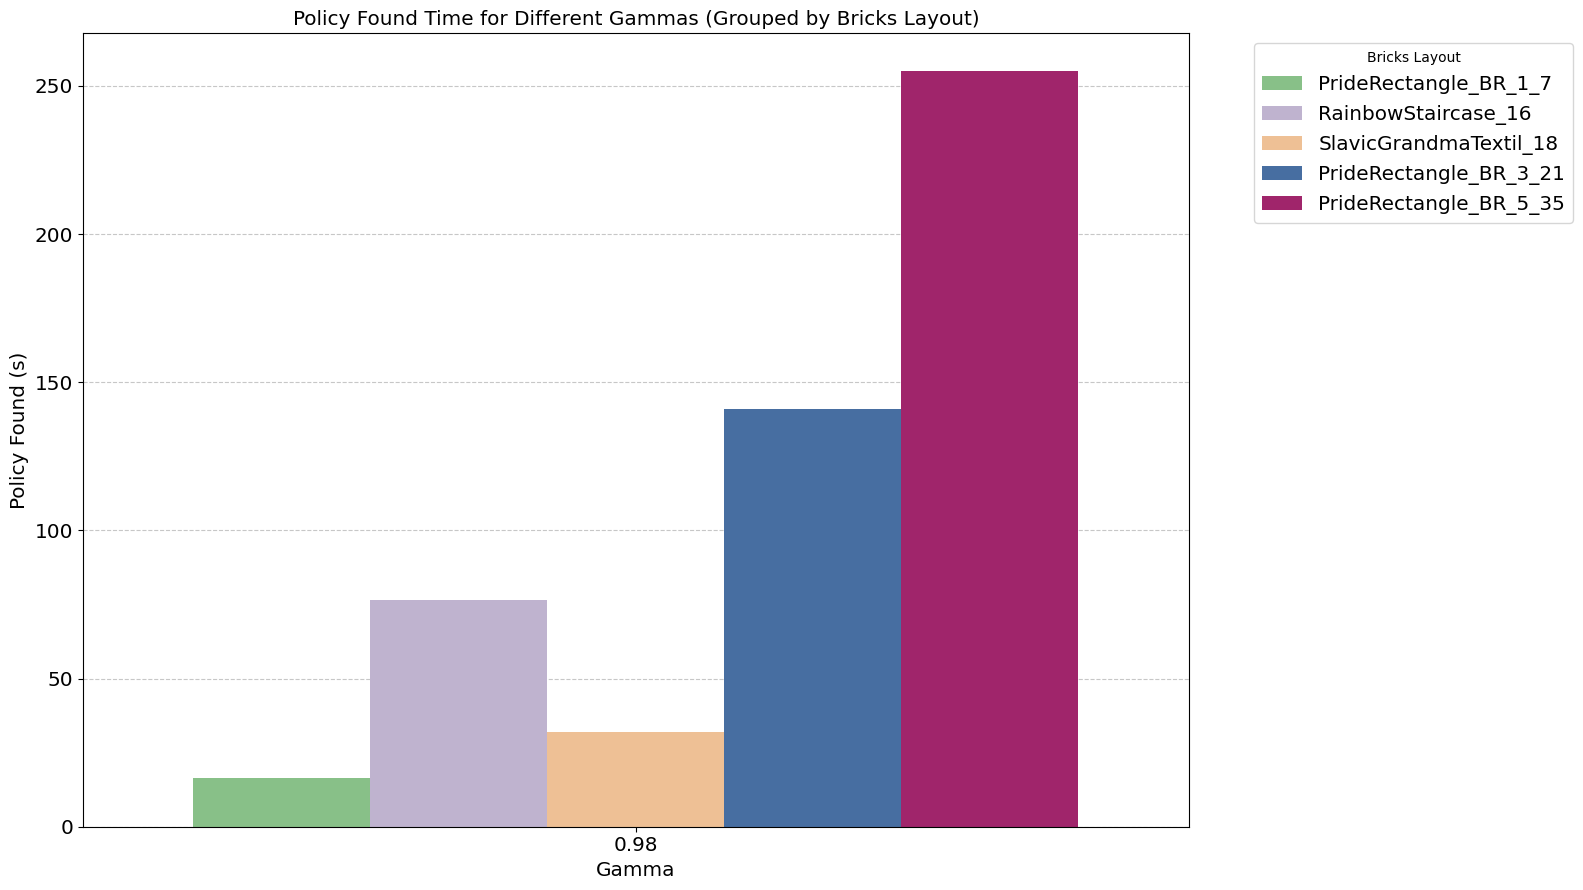

In [579]:
grouped_df = combined_df.groupby(['gamma','bricks_layout', 'brick_length'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df

sns.barplot(
    x='gamma', 
    y='timestamps_to_win', 
    hue='bricks_layout', 
    data=grouped_df[grouped_df['gamma'] == 0.98].sort_values(['brick_length']), 
    palette=color, 
    dodge=True)
plt.xlabel('Gamma')
plt.ylabel('Timestamps to Win')
plt.title('Timestamps to Win for Different Gammas (Grouped by Bricks Layout)')
plt.legend(title='Bricks Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

sns.barplot(
    x='gamma', 
    y='policy_found_in_s', 
    hue='bricks_layout', 
    data=grouped_df[grouped_df['gamma'] == 0.98].sort_values(['brick_length']), 
    palette=color, 
    dodge=True)
plt.xlabel('Gamma')
plt.ylabel('Policy Found (s)')
plt.title('Policy Found Time for Different Gammas (Grouped by Bricks Layout)')
plt.legend(title='Bricks Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# REWARD COMPARISON

In [580]:

df = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/reward/PrideRectangle_BR_3_eps_main_experiments_old.csv')
df = df[df['bricks_layout'] == 'RainbowStaircase']
df['bricks_layout'] = df['bricks_layout'].replace({'RainbowStaircase':'improved_reward'})
df = df[df['gamma'] == 0.98]
# df['bricks_layout']
df_r = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/reward/PrideRectangle_BR_3_eps_main_experiments.csv')
df_r['bricks_layout'] = df_r['bricks_layout'].replace({'PrideRectangle_BR_3':'classic_reward'})

df_r

combined_df = pd.concat([df, df_r])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

grouped_df = combined_df.groupby(['bricks_layout', 'current_episode_num'])['timestamps_to_win'].mean().reset_index()
grouped_df


bricks_layout  current_episode_num  timestamps_to_win
0     classic_reward_15                  100         198.533333
1     classic_reward_15                  200         188.266667
2     classic_reward_15                  300         181.733333
3     classic_reward_15                  400         188.133333
4     classic_reward_15                  500         196.933333
..                  ...                  ...                ...
795  improved_reward_15                39600         138.866667
796  improved_reward_15                39700         138.866667
797  improved_reward_15                39800         138.866667
798  improved_reward_15                39900         138.866667
799  improved_reward_15                40000         138.866667

[800 rows x 3 columns]

/tmp/ipykernel_68943/3536392011.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (bricks, group) in enumerate(grouped_data):


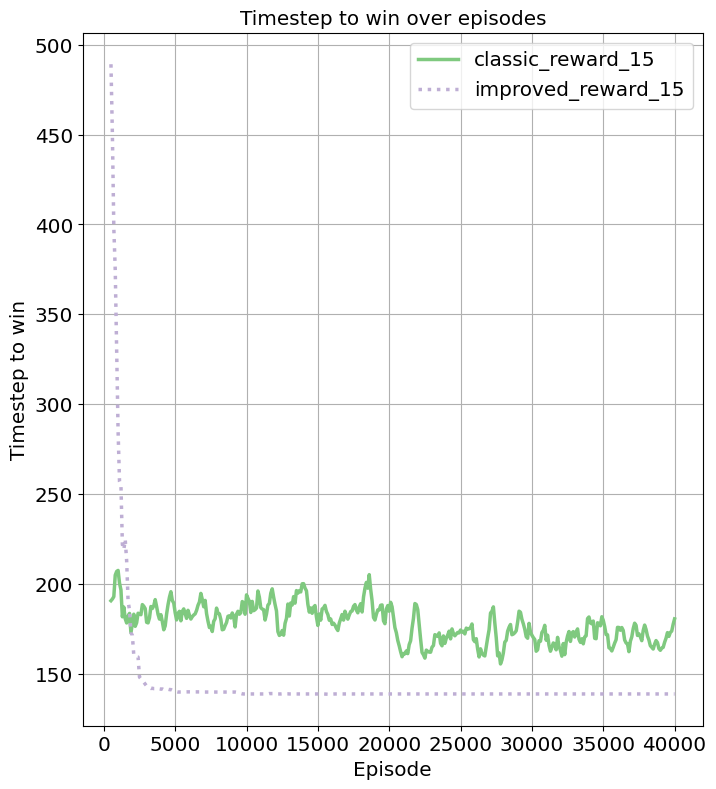

In [581]:
grouped_data = grouped_df.groupby(['bricks_layout'])
plt.figure(figsize=(8,9))
for i, (bricks, group) in enumerate(grouped_data):
        smoothed_data = group['timestamps_to_win'].rolling(window=5).mean()
        plt.plot(
            group['current_episode_num'], 
            smoothed_data, 
            label=f'{bricks}', 
            color=color[i % len(color)], 
            linewidth=2.5, 
            linestyle=line_styles[i % len(line_styles)])

# Set labels and title
plt.xlabel('Episode')
plt.ylabel('Timestep to win')
plt.title('Timestep to win over episodes')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#save plots

## 

In [515]:
# grouped_df = grouped_df[grouped_df['current_episode_num'] == '40000']
grouped_df

bricks_layout  current_episode_num  timestamps_to_win
0     classic_reward_15                  100         198.533333
1     classic_reward_15                  200         188.266667
2     classic_reward_15                  300         181.733333
3     classic_reward_15                  400         188.133333
4     classic_reward_15                  500         196.933333
..                  ...                  ...                ...
795  improved_reward_15                39600         138.866667
796  improved_reward_15                39700         138.866667
797  improved_reward_15                39800         138.866667
798  improved_reward_15                39900         138.866667
799  improved_reward_15                40000         138.866667

[800 rows x 3 columns]

In [516]:
grouped_df_timesteps = grouped_df[grouped_df['current_episode_num'] == 40000]
grouped_df_timesteps

bricks_layout  current_episode_num  timestamps_to_win
399   classic_reward_15                40000         193.600000
799  improved_reward_15                40000         138.866667

In [517]:

df = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/reward/PrideRectangle_BR_3_eps_policy_times_old.csv')
df = df[df['bricks_layout'] == 'RainbowStaircase']
df['bricks_layout'] = df['bricks_layout'].replace({'RainbowStaircase':'improved_reward'})
df = df[df['gamma'] == 0.98]
# df['bricks_layout']
df_r = pd.read_csv('/home/david/TU/ML/ml_ss23_group13/Ex3/breakout_rl/data/reward/PrideRectangle_BR_3_eps_policy_times.csv')
df_r['bricks_layout'] = df_r['bricks_layout'].replace({'PrideRectangle_BR_3':'classic_reward'})

df_r

combined_df = pd.concat([df, df_r])
combined_df['bricks_layout'] = combined_df['bricks_layout'] + "_" + combined_df['brick_length'].apply(str)
combined_df

grouped_df = combined_df.groupby(['bricks_layout'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()
grouped_df


/tmp/ipykernel_68943/302203206.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = combined_df.groupby(['bricks_layout'])['timestamps_to_win','policy_found_in_s'].mean().reset_index()


bricks_layout  timestamps_to_win  policy_found_in_s
0   classic_reward_15         155.333333          64.666667
1  improved_reward_15         130.000000          35.666667

In [518]:
grouped_df['timestamps_to_win'] = grouped_df_timesteps['timestamps_to_win'].to_numpy()
grouped_df

bricks_layout  timestamps_to_win  policy_found_in_s
0   classic_reward_15         193.600000          64.666667
1  improved_reward_15         138.866667          35.666667

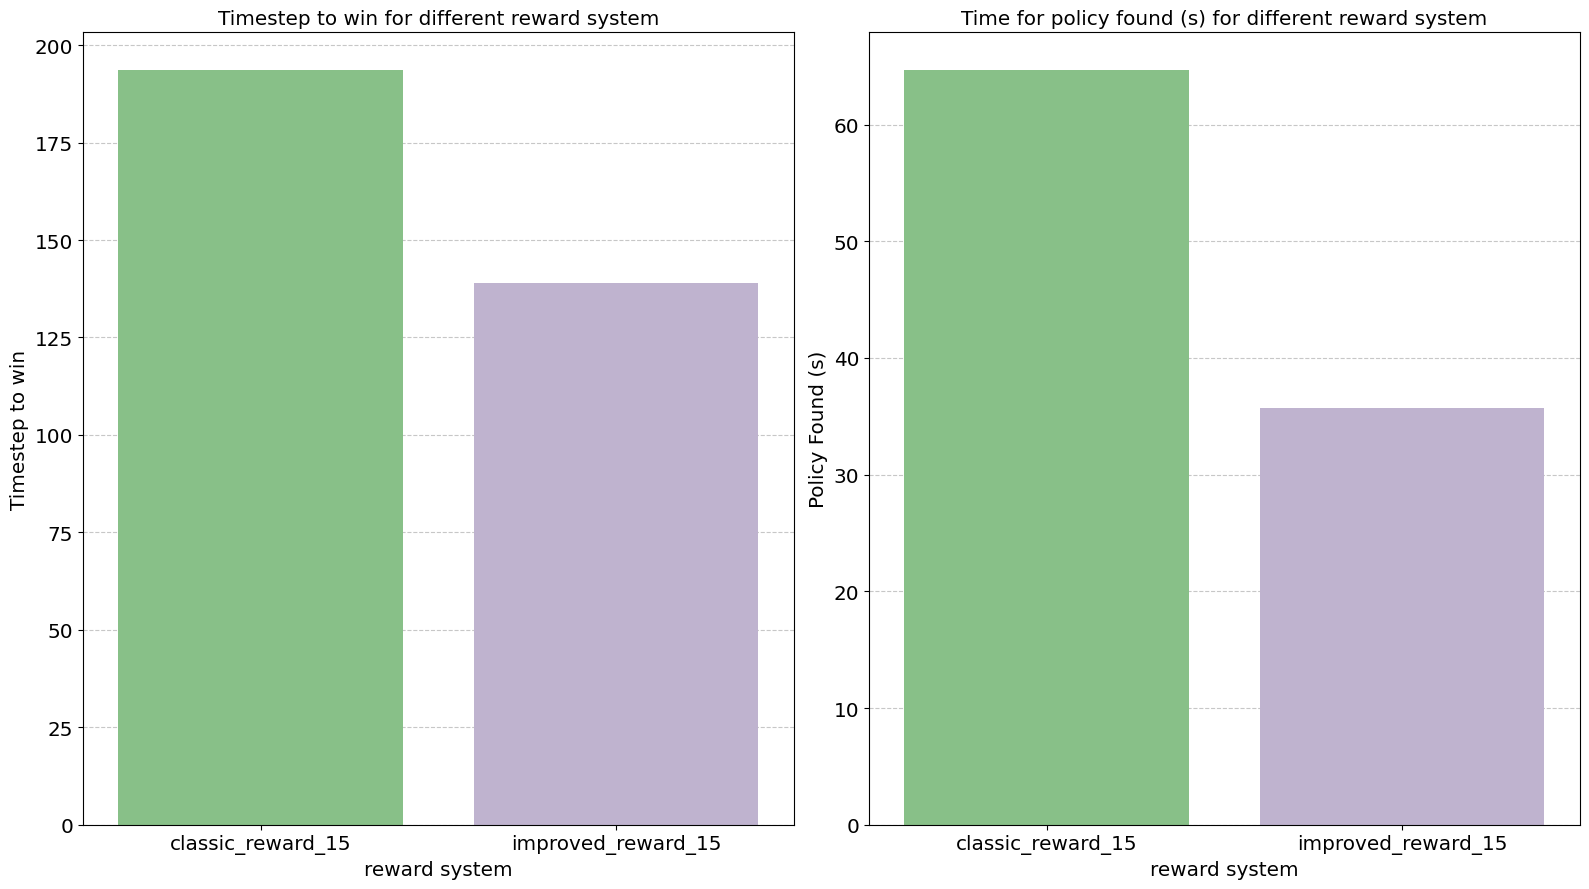

In [520]:
df_melted = grouped_df.melt(id_vars='bricks_layout', 
                    value_vars=['timestamps_to_win', 'policy_found_in_s'],
                    var_name='Metric', value_name='Value')

# Plotting the DataFrame with seaborn and matplotlib
# plt.figure()  # Adjust the figure size as needed

# First subplot for 'timestamps_to_win'
plt.subplot(1, 2, 1)
sns.barplot(x='bricks_layout', y='Value', data=df_melted[df_melted['Metric'] == 'timestamps_to_win'], palette=color)
plt.xlabel('reward system')
plt.ylabel('Timestep to win')
plt.title('Timestep to win for different reward system')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot for 'policy_found_in_s'
plt.subplot(1, 2, 2)
sns.barplot(x='bricks_layout', y='Value', data=df_melted[df_melted['Metric'] == 'policy_found_in_s'], palette=color)
plt.xlabel('reward system')
plt.ylabel('Policy Found (s)')
plt.title('Time for policy found (s) for different reward system')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#save and fix plots